Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [1]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

# Chapter 3 - Visualizing Financial Time Series

옛 격언인 "그림 한 장이 천 마디 말보다 낫다"는 데이터 과학 분야에서도 매우 적용됩니다. 우리는 데이터를 탐색할 뿐만 아니라 데이터 기반 이야기를 전달하기 위해 다양한 종류의 플롯을 사용할 수 있습니다. 금융 시계열 데이터를 다룰 때, 시리즈를 신속하게 플로팅하는 것만으로도 여러 가지 귀중한 통찰을 얻을 수 있습니다. 예를 들어, 시리즈가 연속적인가? 예기치 않은 누락된 값이 있는가? 일부 값이 이상치처럼 보이는가? 우리가 추가 분석에 사용할 수 있는 패턴이 있는가? 이러한 질문들은 우리의 분석을 도와주기 위한 잠재적인 질문 중 일부에 불과합니다. 초기 프로젝트 단계에서 시각화의 주요 목표는 데이터에 익숙해지고 좀 더 잘 이해하는 것입니다. 그 후에야 우리는 적절한 통계 분석을 수행하고 시계열의 미래 값을 예측하기 위한 머신러닝 모델을 구축할 수 있습니다.

데이터 시각화와 관련하여, 파이썬은 다양한 수준의 복잡도(학습 곡선 포함)와 약간 다른 품질의 출력을 요구하는 다양한 라이브러리를 제공합니다. 가장 많이 사용되는 시각화 라이브러리로는 다음과 같은 것들이 있습니다:
- matplotlib
- seaborn
- plotly
- altair
- plotnine — 이 라이브러리는 R의 ggplot을 기반으로 하므로 R에 익숙한 사람들에게 특히 흥미로울 수 있습니다.
- bokeh

이 장에서는 위에서 언급한 라이브러리 중 몇 가지를 사용할 것입니다. 특정 플롯을 하나의 라이브러리에서 한 줄로 생성할 수 있는 반면 다른 라이브러리에서는 20줄이 걸린다면, 선택은 명확합니다. 이 장에서 보여주는 모든 시각화를 위에서 언급한 라이브러리 중 어떤 것을 사용해도 만들 수 있을 것입니다. 가장 인기 있는 라이브러리에서 제공하지 않는 매우 맞춤형 플롯을 만들어야 한다면 matplotlib를 선택하는 것이 좋습니다. matplotlib를 사용하면 거의 모든 것을 만들 수 있기 때문입니다.

이 장에서 다룰 내용은 다음과 같습니다:
- 시계열 데이터의 기본 시각화
- 계절적 패턴 시각화
- 인터랙티브 시각화 만들기
- 캔들스틱 차트 만들기

## 3.1 Basic visualization of time series data

시계열 데이터를 시각화하는 가장 일반적인 출발점은 간단한 선 그래프입니다. 이는 시간(수평축, x축) 동안 시계열 값(수직축, y축)을 연결하는 선을 의미합니다. 이 플롯을 사용하면 데이터의 잠재적인 문제를 신속하게 식별하고, 지배적인 패턴이 있는지 확인할 수 있습니다. 이 레시피에서는 선 그래프를 만드는 가장 쉬운 방법을 보여드리겠습니다. 이를 위해 2020년의 마이크로소프트 주가 데이터를 다운로드할 것입니다.

### How to do it...

라이브러리를 불러온 후, 우리는 2020년 마이크로소프트의 주가를 다운로드하고 조정 종가(adjusted close price)를 사용해 단순 수익률을 계산했습니다. 그 다음, pandas DataFrame의 plot 메서드를 사용하여 간단하게 선 그래프를 생성했습니다. 우리가 지정한 유일한 인수는 그래프의 제목이었습니다. 기억해야 할 점은 DataFrame에서 단일 열을 부분집합으로 추출한 후에(실제로는 pd.Series 객체) plot 메서드를 사용했으며, 날짜는 DataFrame/Series의 인덱스로 설정되었기 때문에 자동으로 x축에 반영되었다는 것입니다. 우리는 더 명시적인 표기법을 사용하여 동일한 플롯을 생성할 수도 있었습니다: 

```python
df.plot.line(y="Adj Close", title="MSFT stock in 2020")
```

plot 메서드는 결코 선 그래프(기본값)만 생성하는 데 제한되지 않습니다. 우리는 히스토그램, 막대 그래프, 산점도, 파이 차트 등도 생성할 수 있습니다. 이러한 플롯을 선택하려면 kind 인수에 해당하는 그래프 유형을 지정해야 합니다. 산점도와 같은 일부 플롯의 경우, 두 축에 대한 값을 명시적으로 제공해야 할 수도 있다는 점을 유념하세요. 4단계에서는 두 개의 서브플롯으로 구성된 그래프를 생성했습니다. 먼저 관심 있는 열(가격과 수익률)을 선택한 다음, 서브플롯을 생성하고 x축을 공유하도록 지정하면서 plot 메서드를 사용했습니다.

1. Import the libraries:

In [10]:
import pandas as pd 
import numpy as np
import yfinance as yf

2. Download Microsoft's stock prices from 2020 and calculate simple returns:

In [11]:
df = yf.download("MSFT",
                 start="2020-01-01", 
                 end="2020-12-31",
                 auto_adjust = False, 
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.dropna()

3. Plot the adjusted close prices:

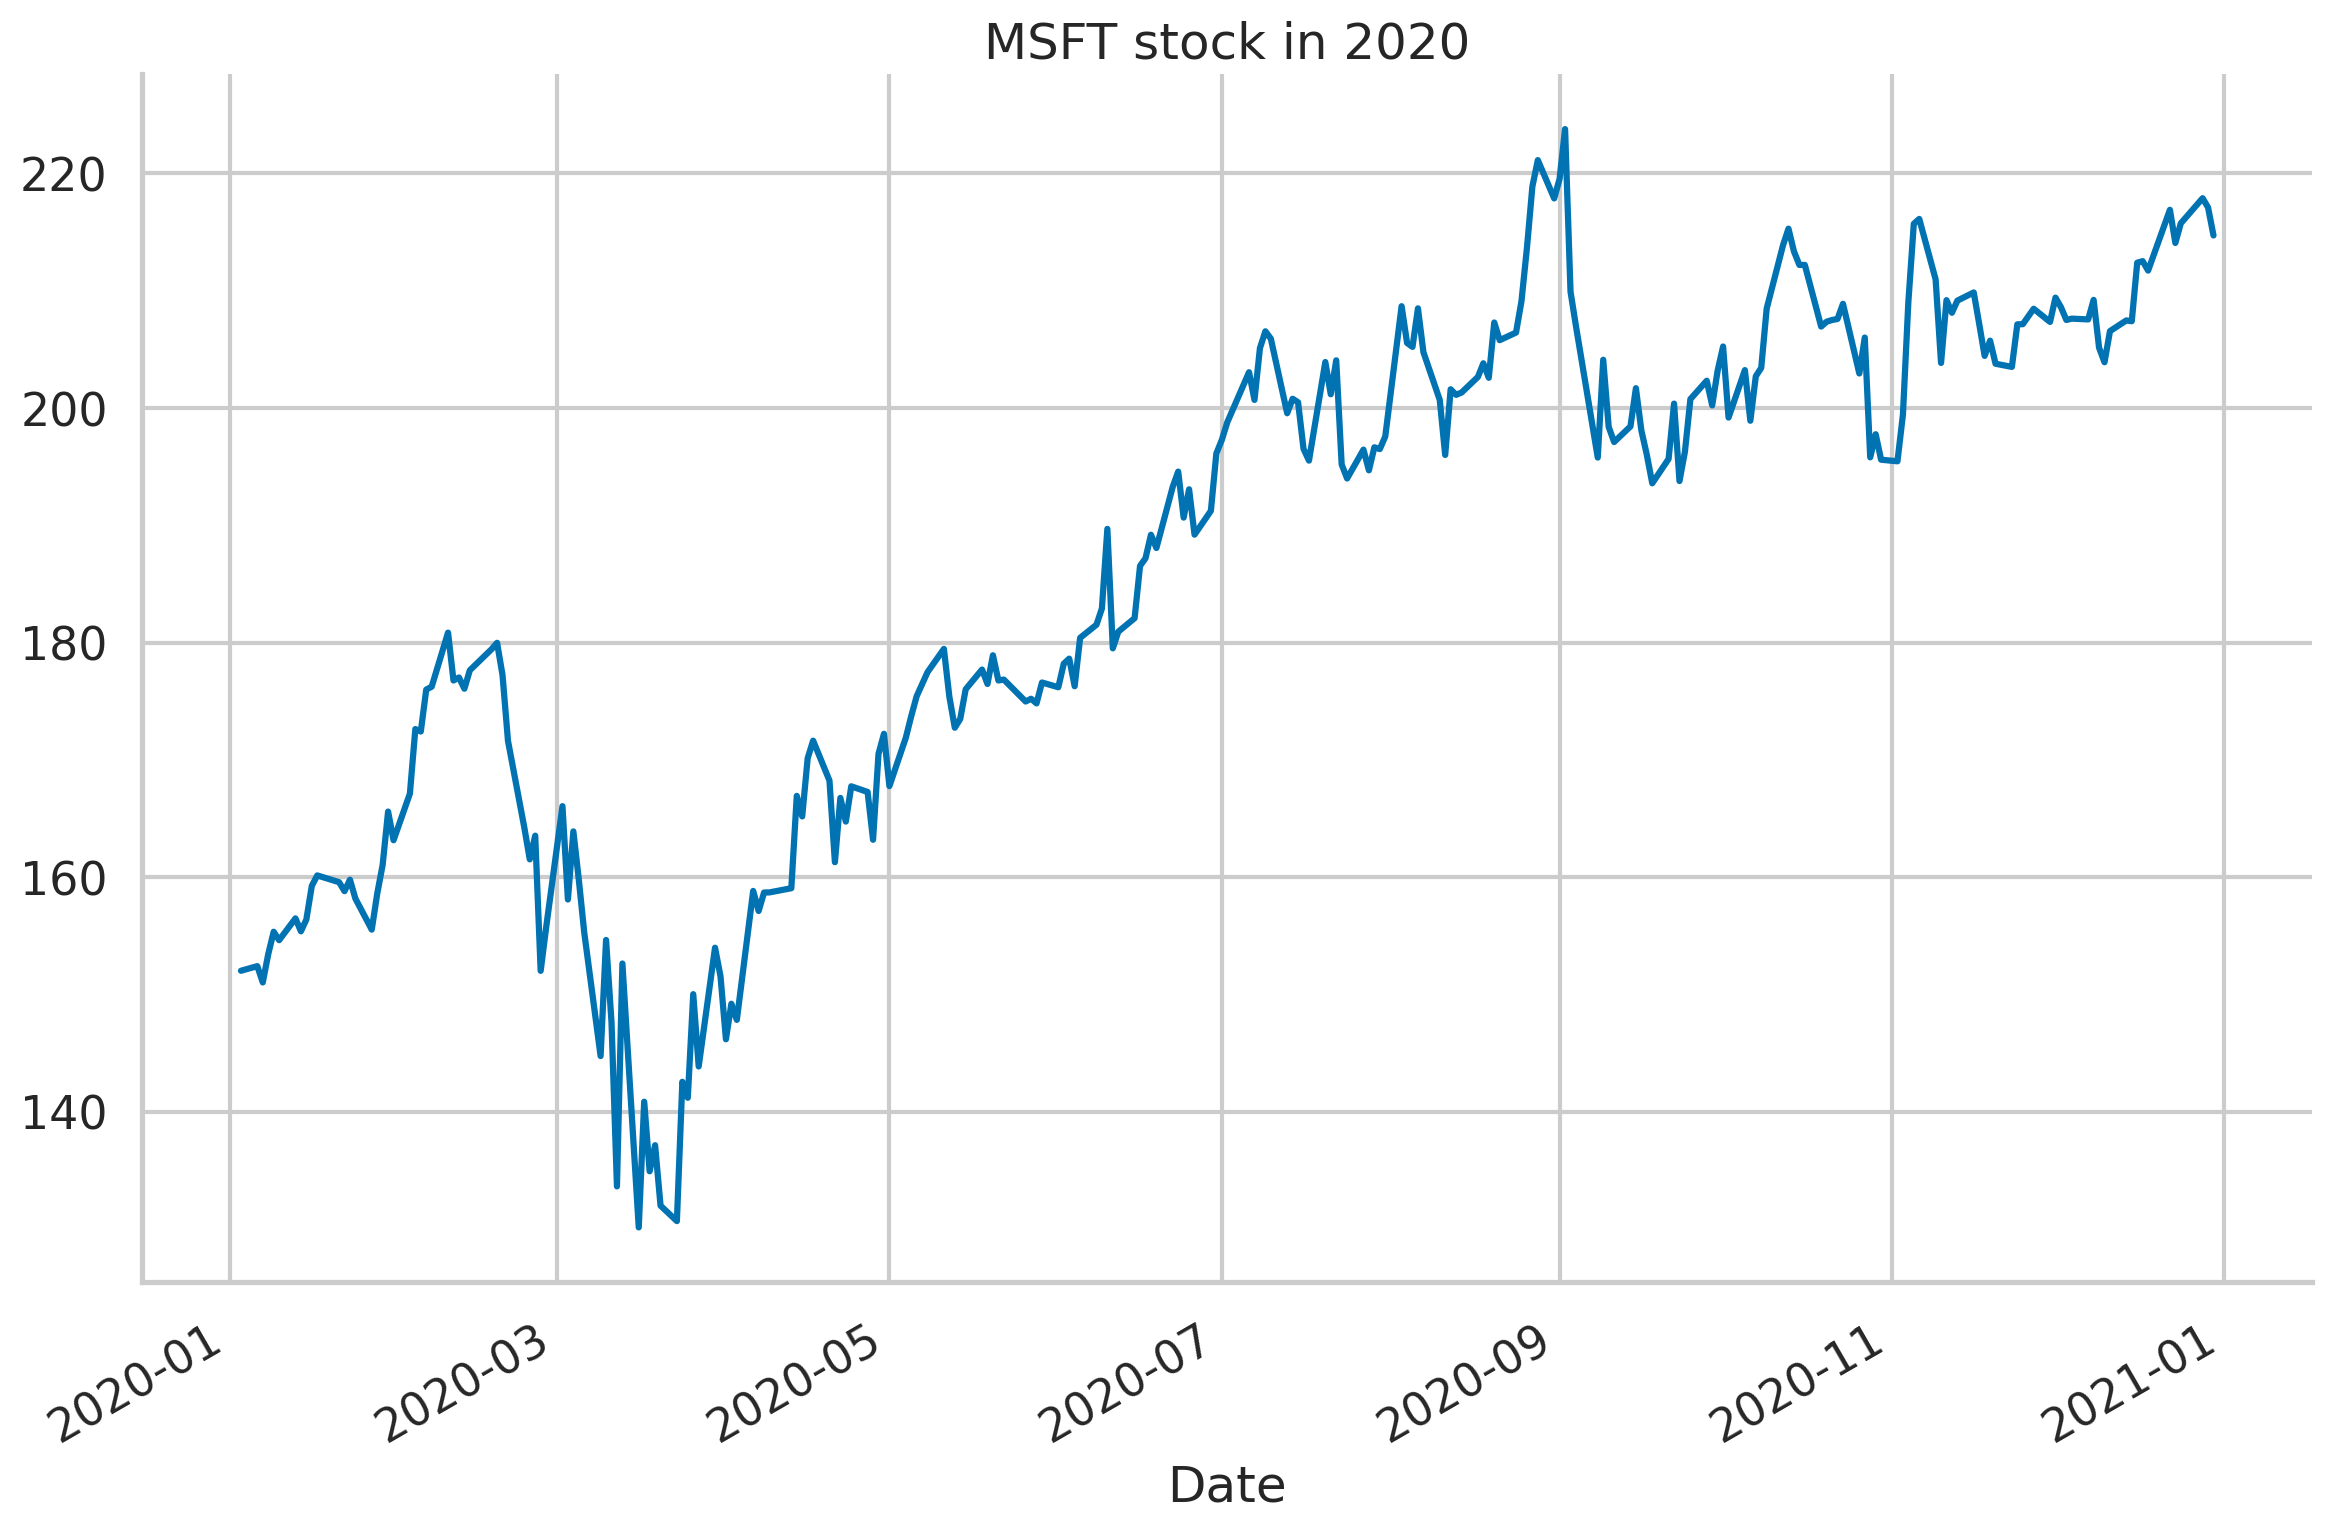

In [12]:
df["Adj Close"].plot(title="MSFT stock in 2020");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_1', dpi=200)

It is the same as running the following:

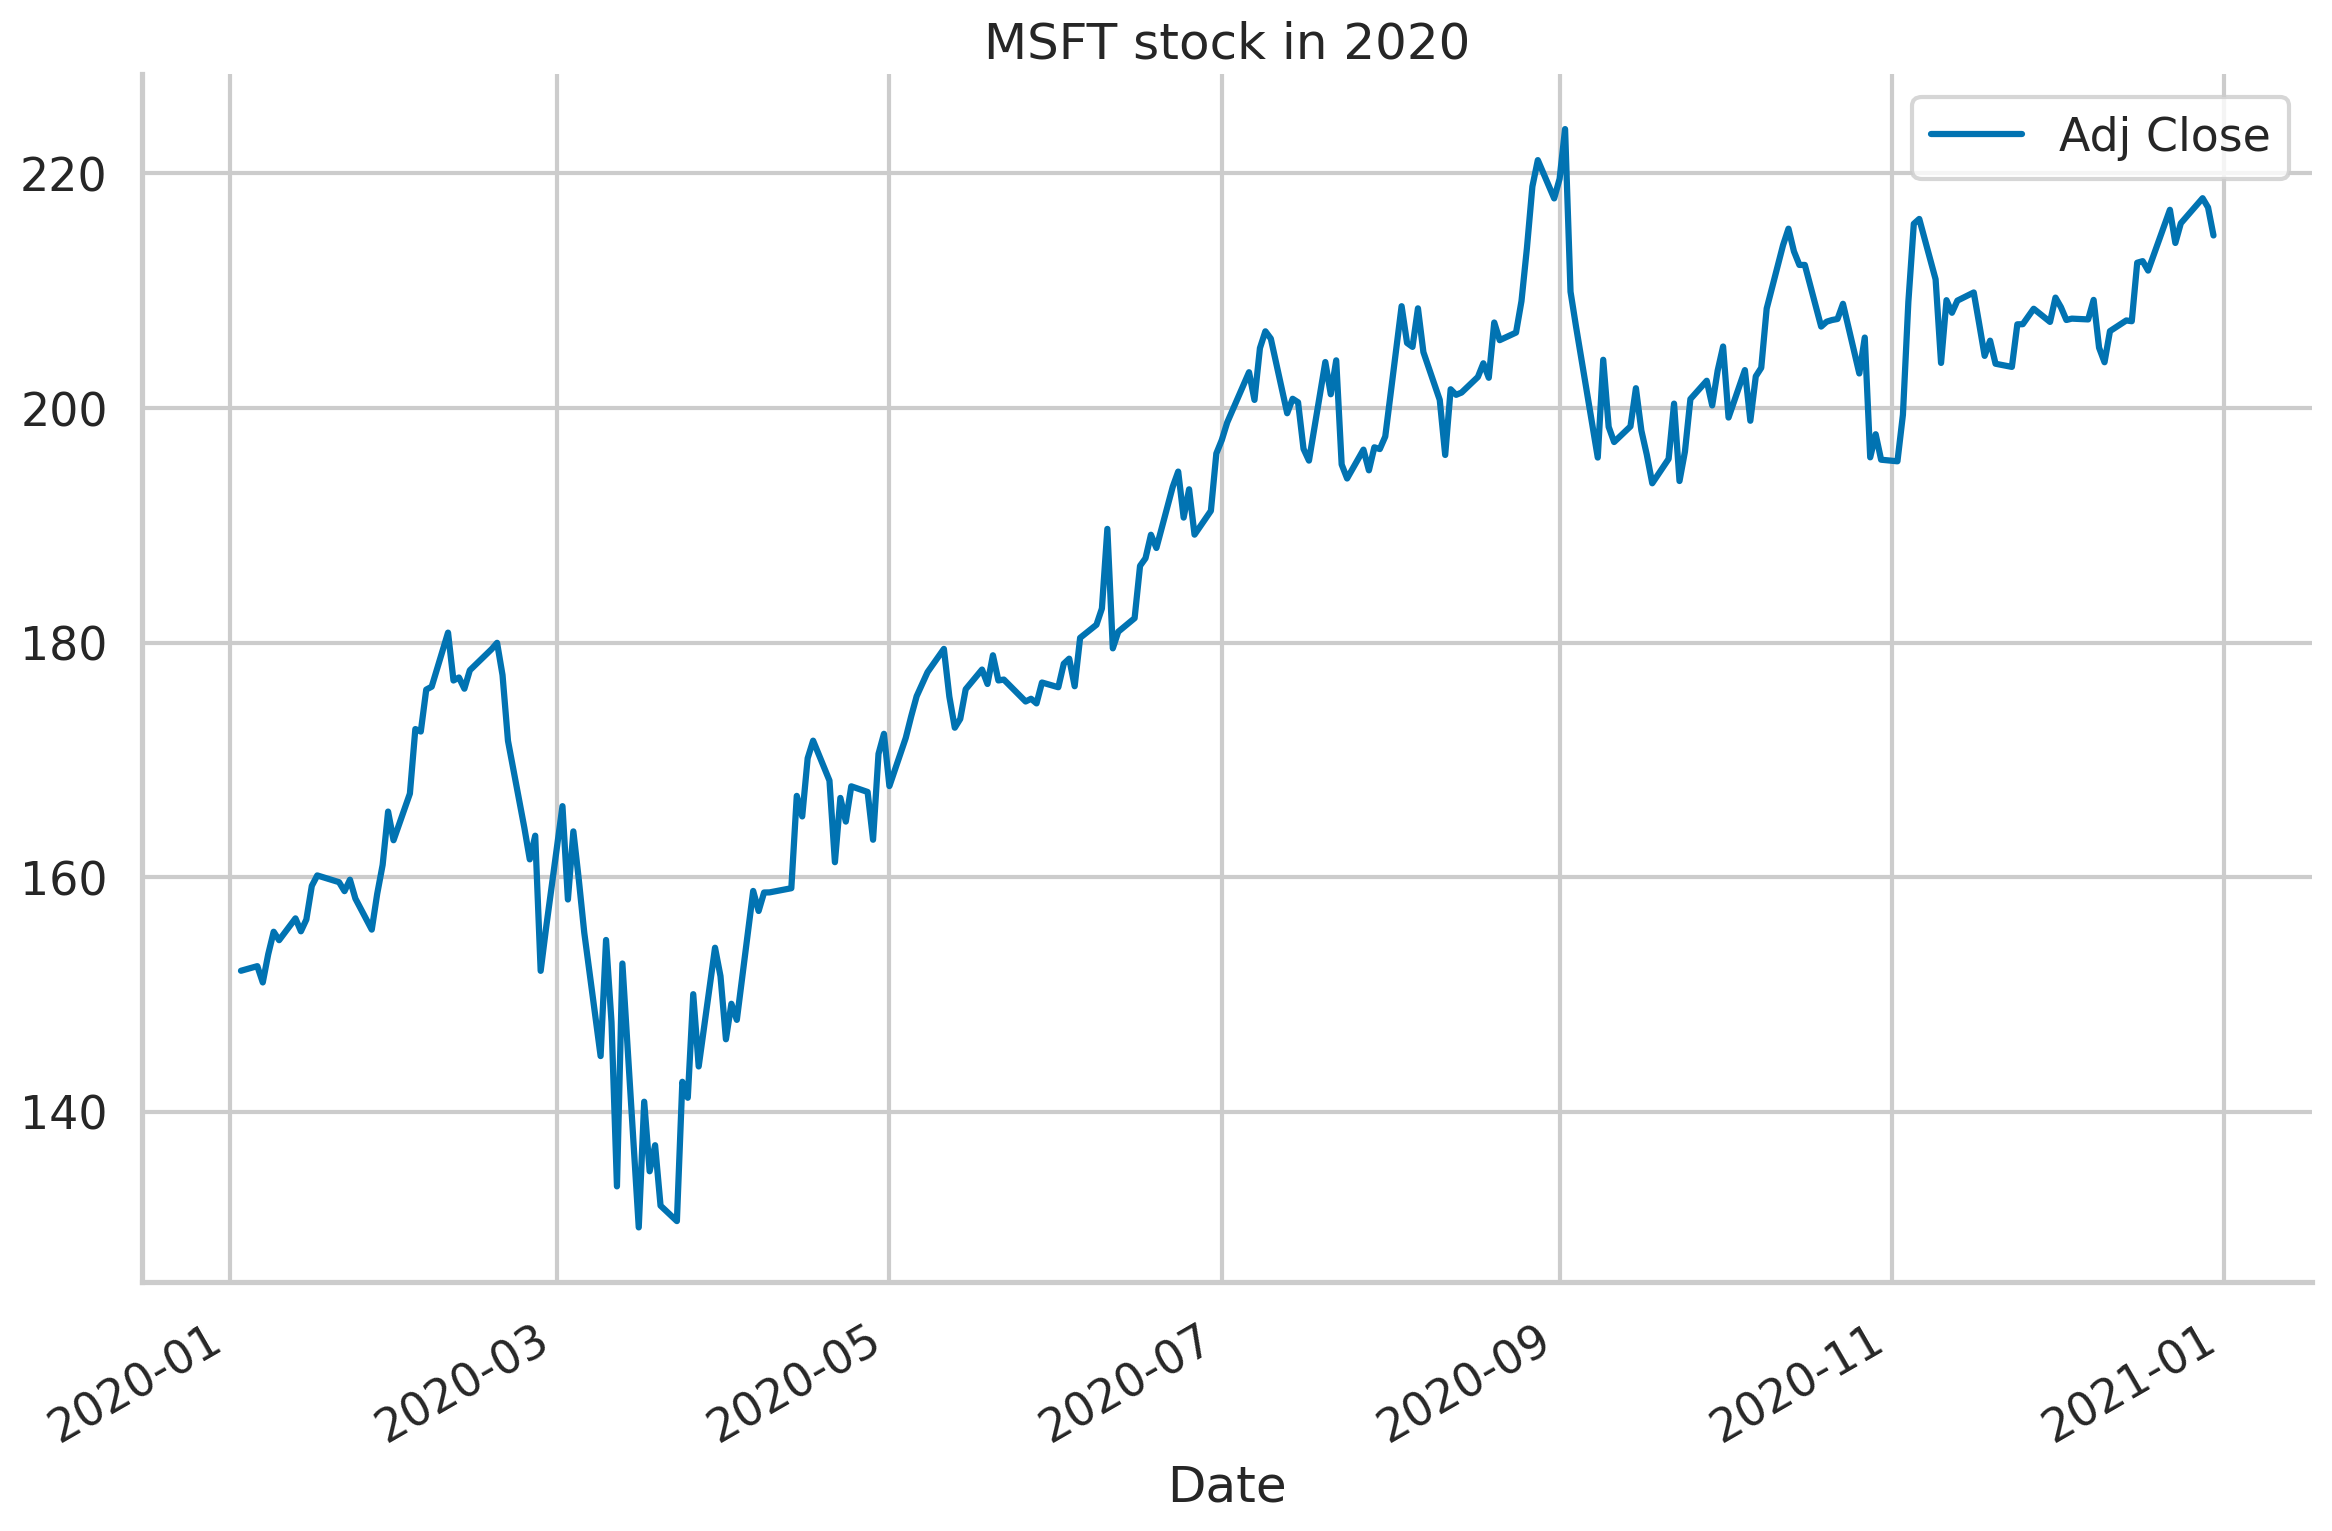

In [13]:
df.plot.line(y="Adj Close", title="MSFT stock in 2020");

sns.despine()
plt.tight_layout()

4. Plot the adjusted close prices and simple returns in one plot:

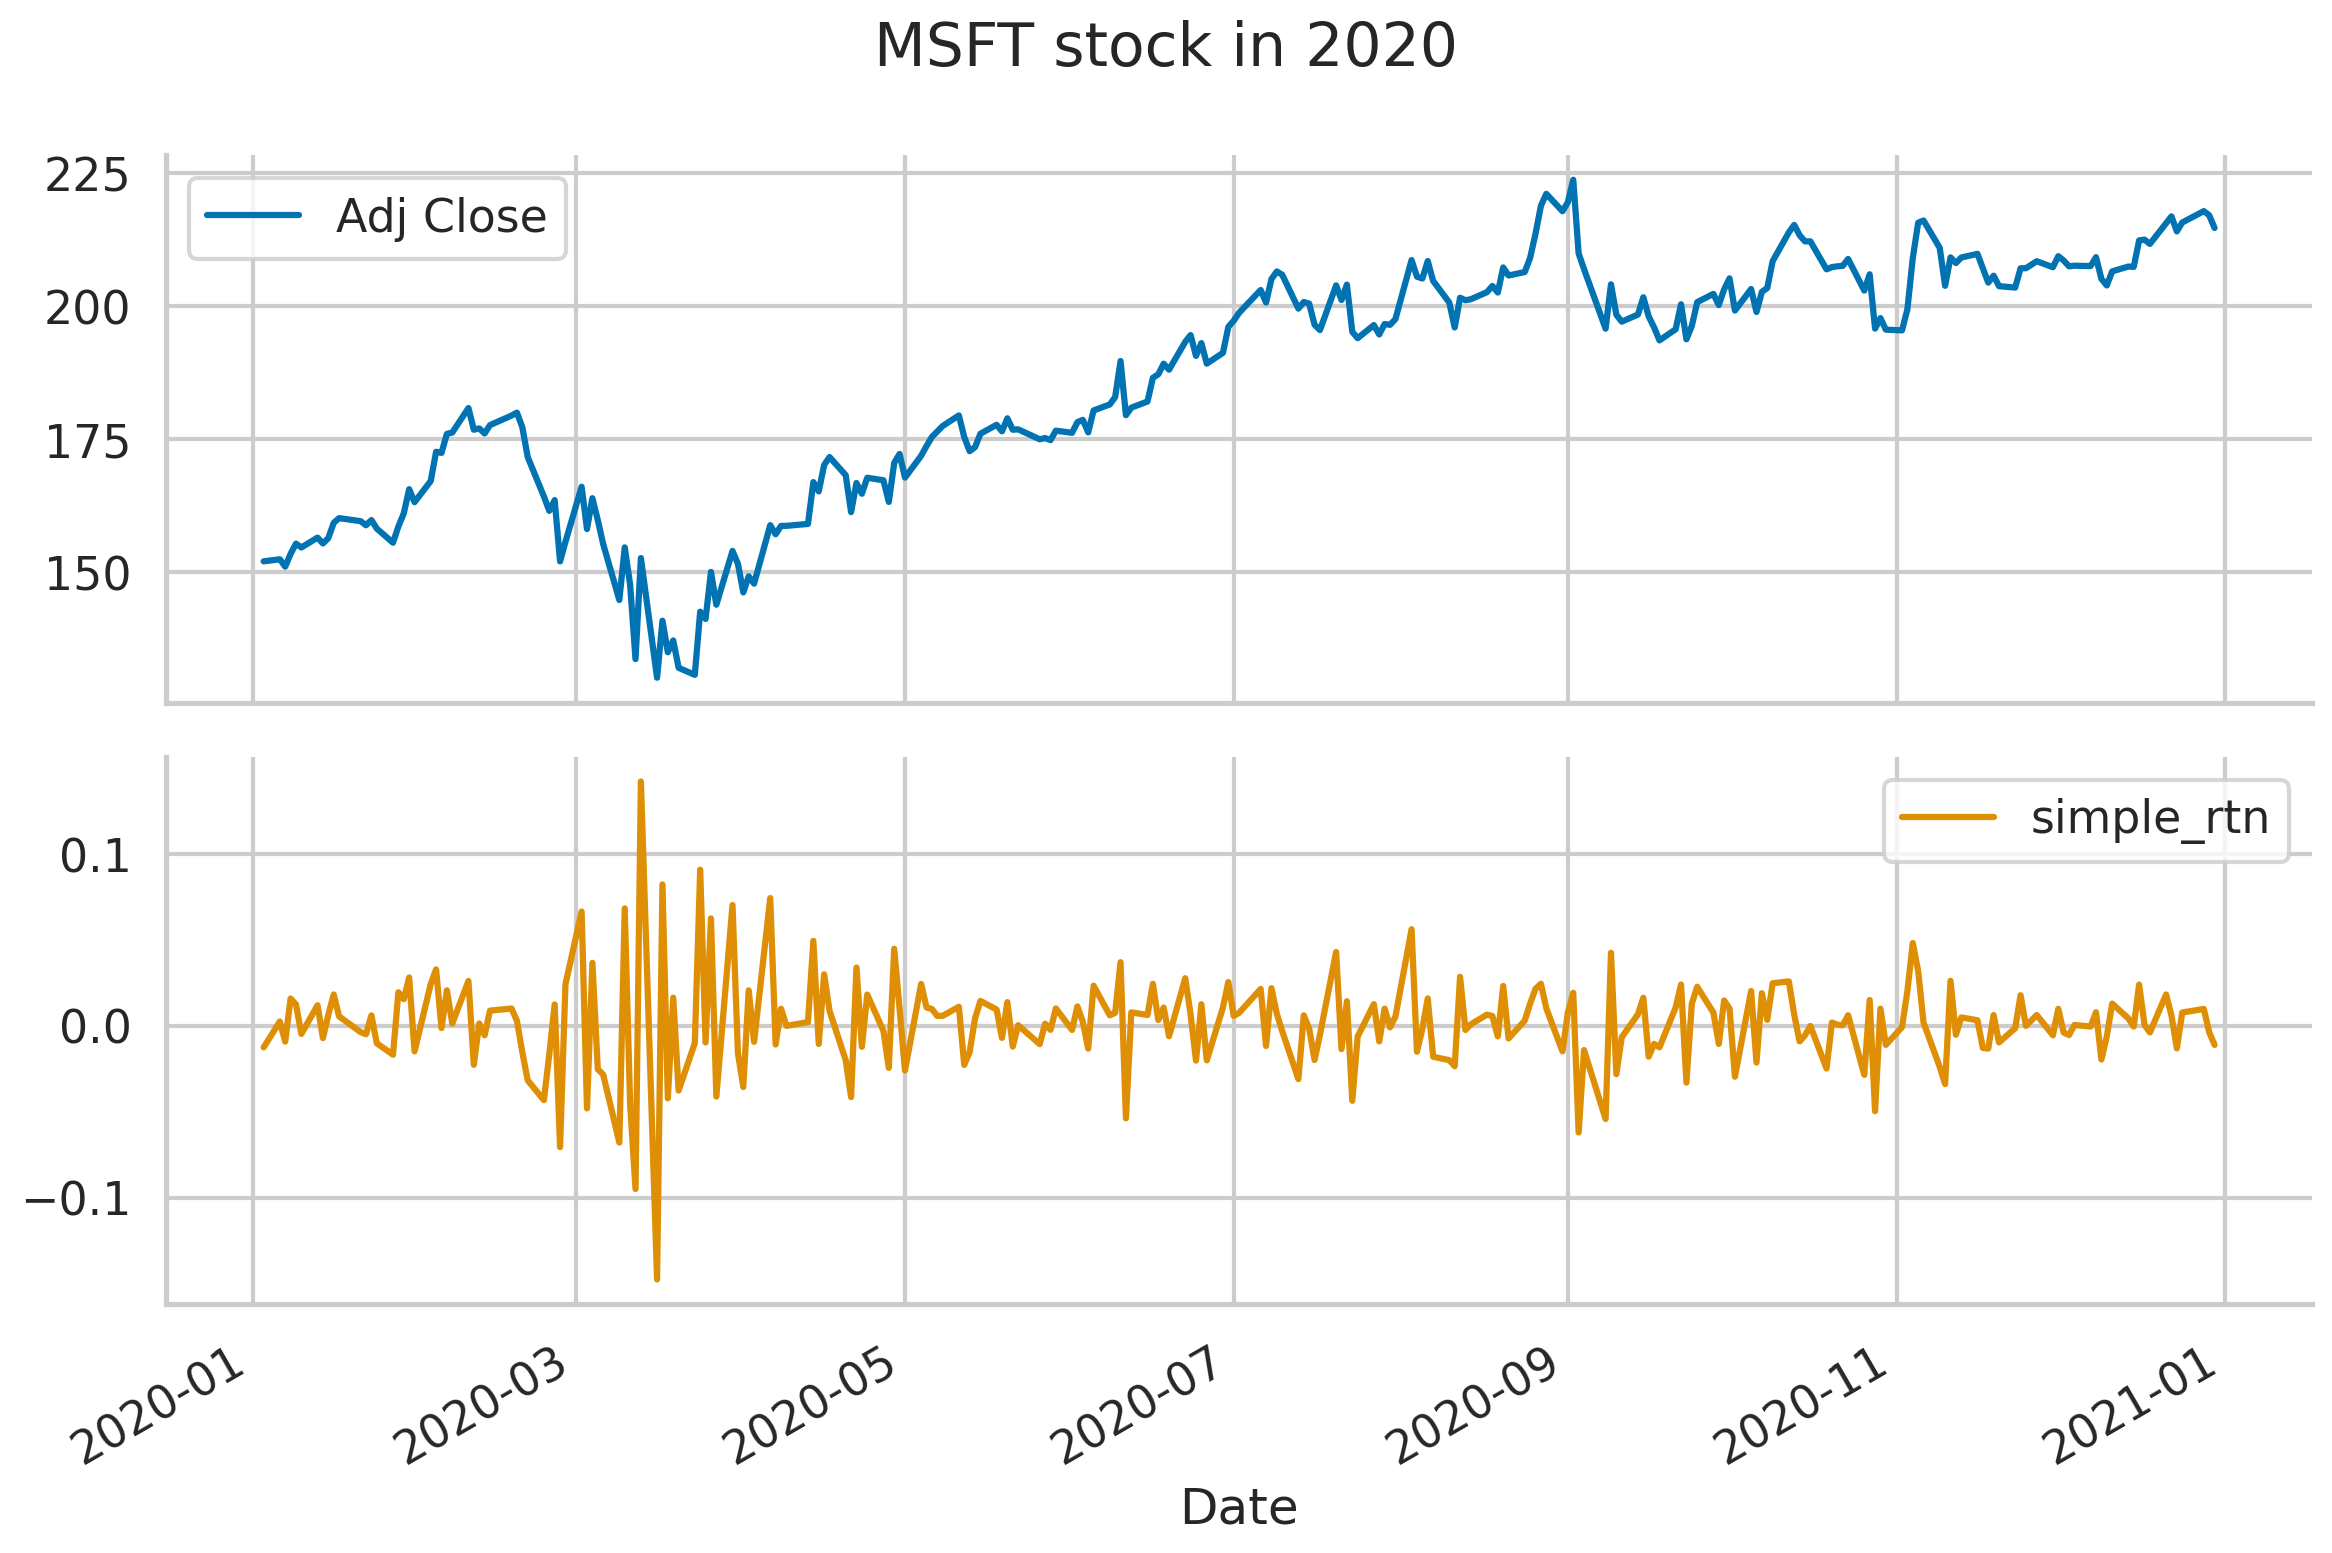

In [14]:
(
    df[["Adj Close", "simple_rtn"]]
    .plot(subplots=True, sharex=True, 
          title="MSFT stock in 2020")
);

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_2', dpi=200)

### There's more


- 선 그래프를 만드는 것에 대해 언급할 만한 더 많은 흥미로운 사항들이 있지만, 실무에서 가장 유용할 수 있는 두 가지에 대해서만 다루겠습니다. 첫 번째는 matplotlib의 객체 지향 인터페이스를 사용하여 이전과 유사한 그래프를 생성할 수 있다는 것입니다.

1. Create a similar plot to the previous one using `matplotlib`'s object-oriented interface:

- 이 그래프는 이전 그래프와 매우 유사하지만, y축 라벨과 같은 몇 가지 추가적인 세부 사항이 포함되어 있습니다. 여기서 중요한 점은 matplotlib의 객체 지향 인터페이스입니다. plt.subplots를 호출할 때, 우리는 한 열에 두 개의 서브플롯을 생성하고, 그들이 x축을 공유하도록 지정했습니다. 그러나 정말 중요한 것은 함수의 출력입니다. 즉:

fig라는 Figure 클래스의 인스턴스: 우리는 이것을 우리의 플롯을 담는 컨테이너로 생각할 수 있습니다.
ax라는 Axes 클래스의 인스턴스(플롯의 x축 및 y축과 혼동하지 마세요): 이것들은 요청된 서브플롯들입니다. 우리의 경우, 두 개의 서브플롯이 있습니다.

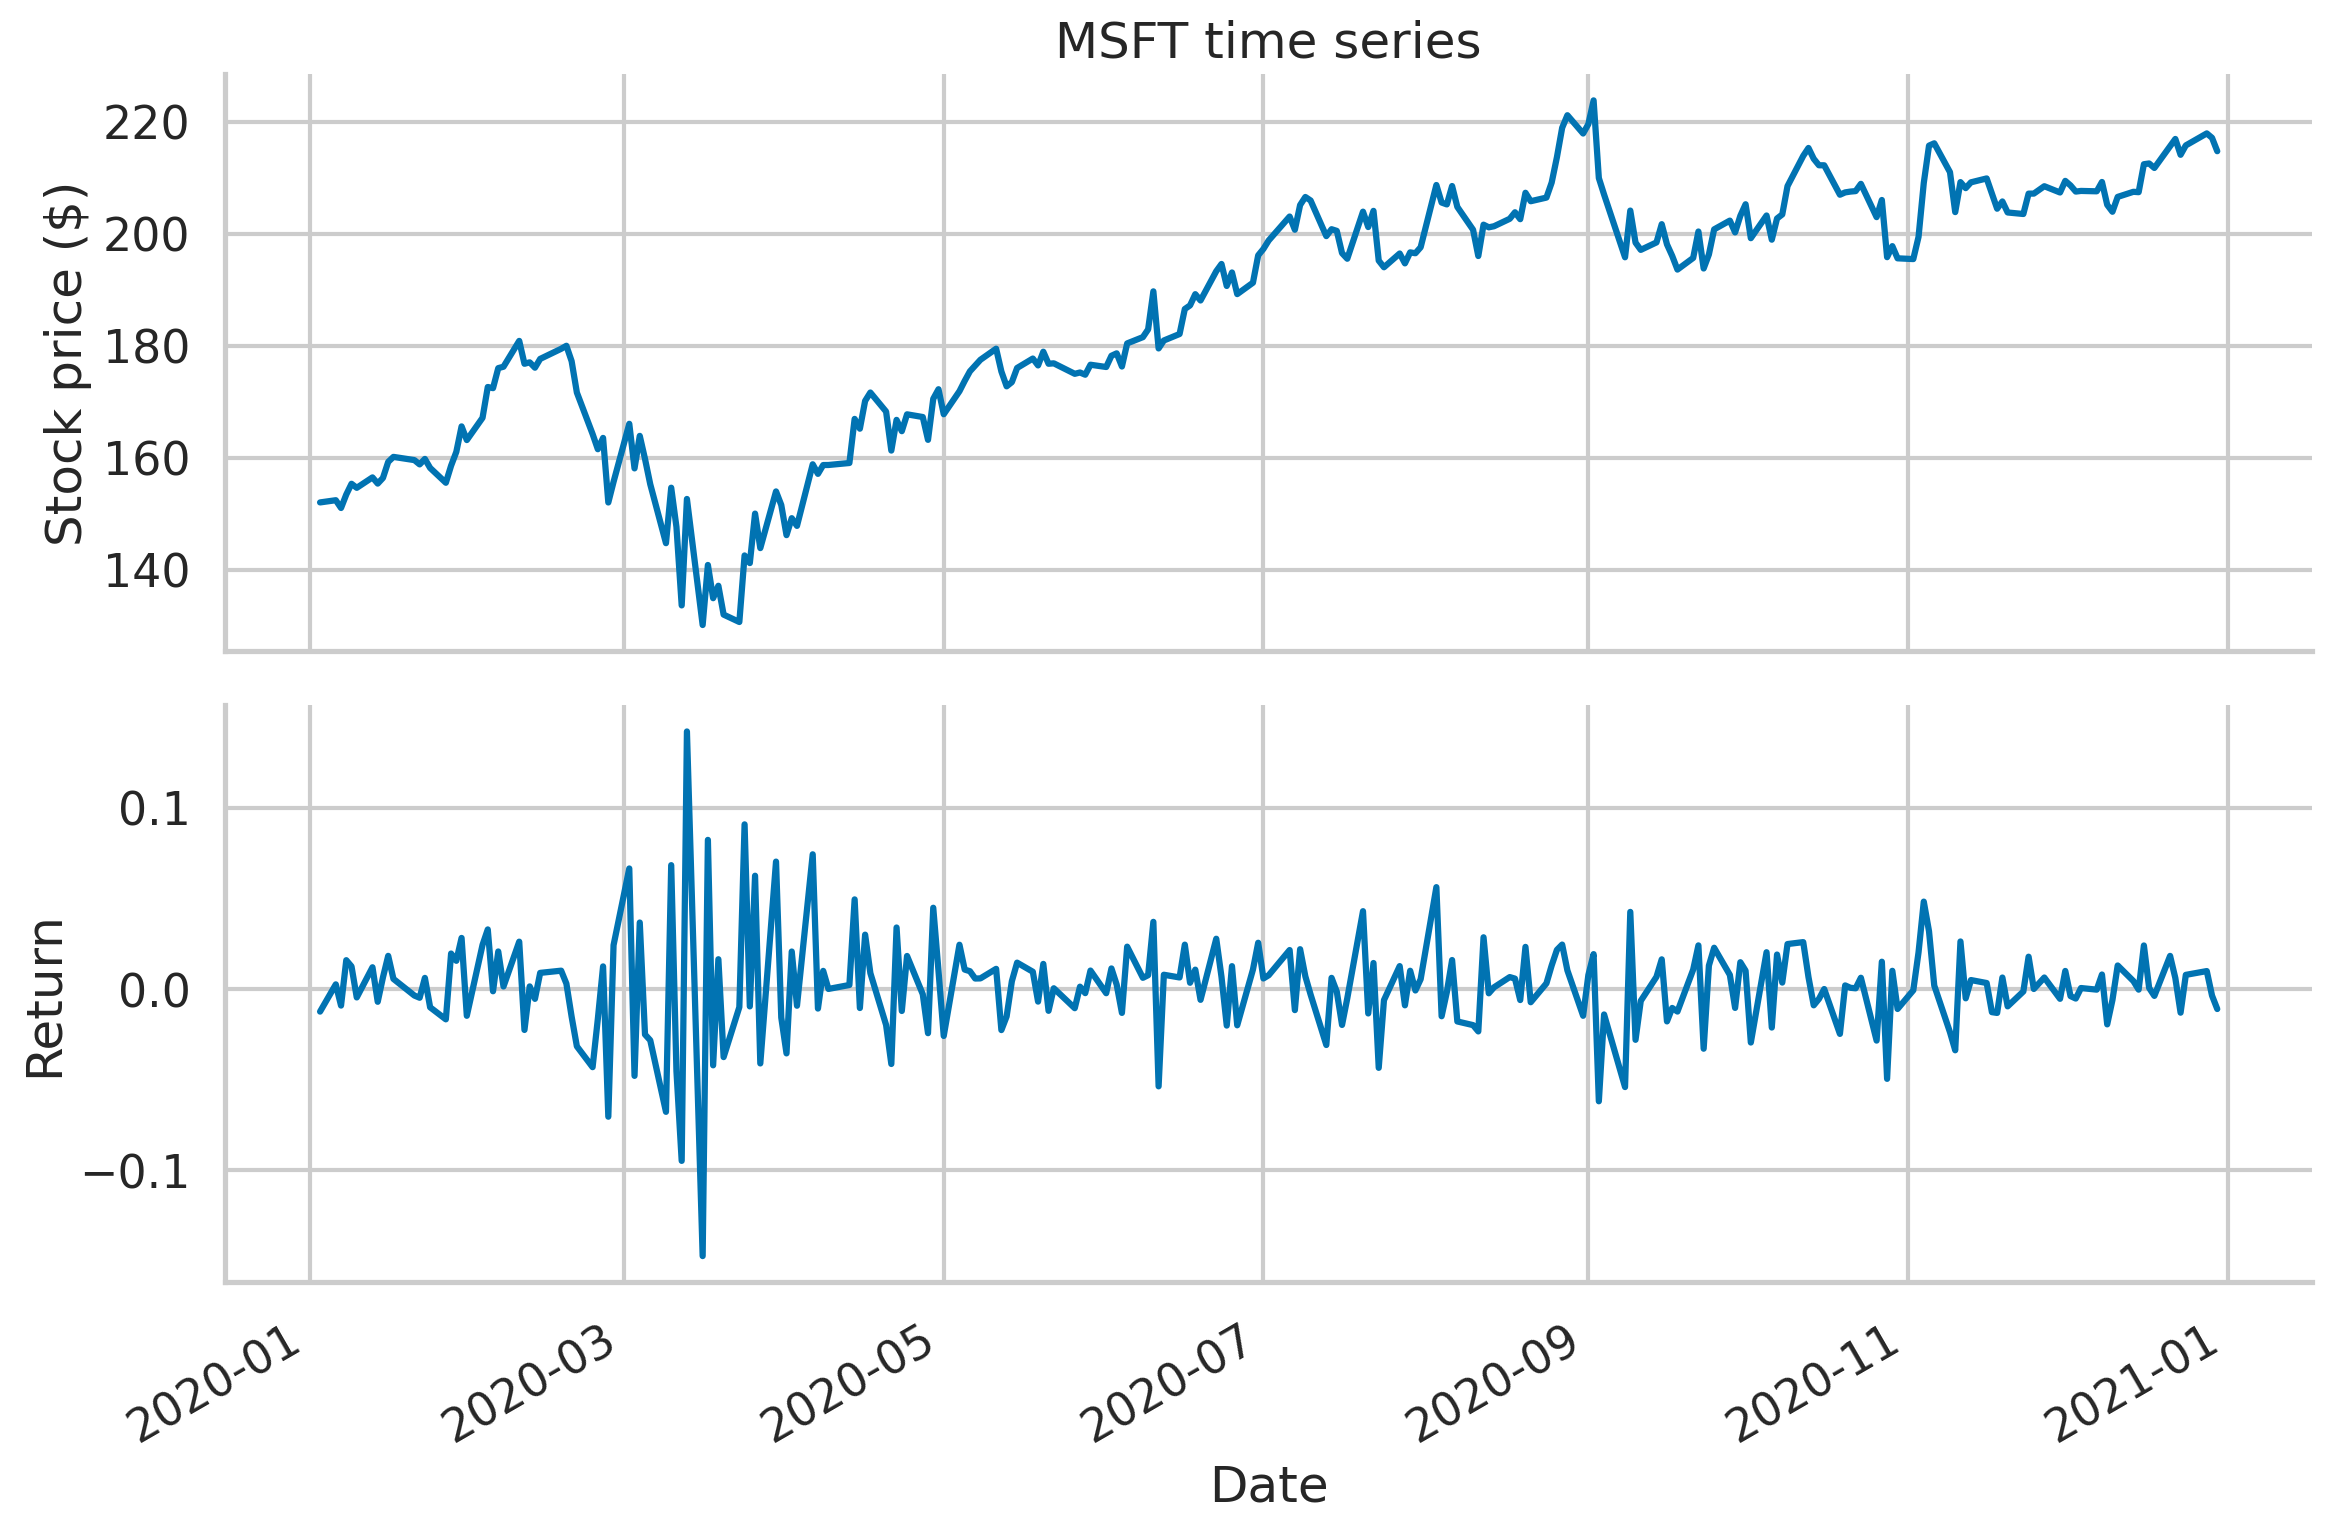

In [15]:
fig, ax = plt.subplots(2, 1, sharex=True)

# add prices
df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="MSFT time series",
          ylabel="Stock price ($)")
    
# add volume
df["simple_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Return")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_3', dpi=200)

그림 3.4는 figure와 axes 간의 관계를 설명합니다:
그림 3.4: matplotlib의 figure와 axes 간의 관계
어떤 figure에서도, 임의의 개수의 서브플롯을 행렬 형태로 배치할 수 있습니다. 또한, 상단 행이 하나의 넓은 서브플롯으로 구성되고, 하단 행이 크기가 절반인 두 개의 작은 서브플롯으로 구성된 보다 복잡한 구성을 만들 수도 있습니다.

<img src="./image/fig_03_04.png">

2. Change the plotting backend of `pandas` to `plotly`:

- 위의 플롯을 구축하면서, 우리는 여전히 pandas DataFrame의 plot 메서드를 사용했습니다. 차이점은 우리가 명시적으로 figure 내에서 서브플롯을 배치할 위치를 지정했다는 것입니다. 이를 위해 ax 인수를 제공했습니다. 물론, matplotlib의 함수를 사용하여 플롯을 생성할 수도 있었지만, 우리는 몇 줄의 코드를 절약하고자 했습니다.

언급할 가치가 있는 두 번째 사항은 pandas의 플로팅 백엔드를 다른 라이브러리(예: plotly)로 변경할 수 있다는 것입니다. 다음 코드 스니펫을 사용하여 그렇게 할 수 있습니다:

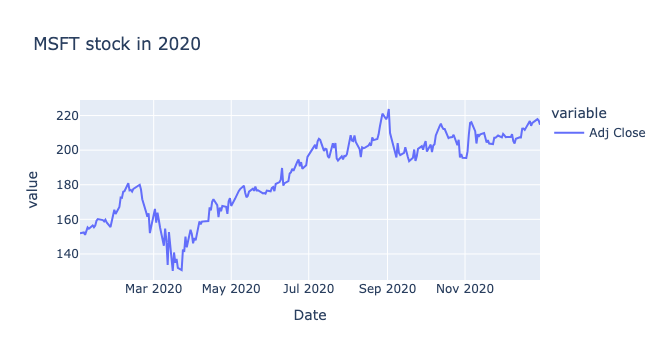

In [16]:
df["Adj Close"].plot(title="MSFT stock in 2020", backend="plotly")

코드를 실행하면 다음과 같은 인터랙티브 그래프가 생성됩니다:
그림 3.5: plotly를 사용해 시각화한 2020년 마이크로소프트의 조정 주가
불행히도 plotly 백엔드를 사용하는 장점은 인쇄물로는 보이지 않습니다. 노트북에서는 그래프 위에 마우스를 올려놓으면 정확한 값(및 툴팁에 포함된 다른 정보)을 확인할 수 있고, 특정 기간을 확대하거나, 여러 선이 있을 경우 선을 필터링하는 등 다양한 기능을 사용할 수 있습니다. 시각화의 인터랙티브 기능을 테스트하려면 GitHub에 있는 동반 노트북을 참고하세요.

plot 메서드의 백엔드를 변경할 때 두 가지를 유념해야 합니다:

- 1. 해당 라이브러리가 설치되어 있어야 합니다.
- 2. 일부 백엔드는 plot 메서드의 특정 기능, 특히 subplots 인수와 관련된 문제를 가질 수 있습니다.

이전 플롯을 생성할 때는 플롯을 생성하는 동안 백엔드를 지정했습니다. 이는 명시적으로 지정하지 않은 다음 플롯이 기본 백엔드(matplotlib)를 사용하여 생성된다는 것을 의미합니다. 다음 코드 스니펫을 사용하여 전체 세션/노트북의 플로팅 백엔드를 변경할 수 있습니다:

```python
pd.options.plotting.backend = "plotly"
```

또한 https://matplotlib.org/stable/index.html—matplotlib의 문서는 라이브러리에 대한 방대한 정보를 제공하는 보물창고입니다. 특히, 사용자 정의 시각화를 만드는 방법에 대한 유용한 튜토리얼과 힌트를 포함하고 있습니다.

In [10]:
# df["Adj Close"].plot(backend="altair")

## 3.2 Visualizing seasonal patterns

- 우리가 6장에서 배울 시간 시계열 분석과 예측에서는 계절성이 시간 시계열 분석에서 매우 중요한 역할을 한다는 것을 알게 될 것입니다. 계절성(seasonality)이란, 1년보다 짧은 주기로 발생하는 패턴의 존재를 의미합니다. 예를 들어, 아이스크림 판매량을 상상해 보세요. 아이스크림 판매는 여름철에 가장 높은 정점을 찍을 가능성이 크며, 겨울에는 판매량이 감소할 것입니다. 그리고 이러한 패턴은 해마다 반복해서 나타날 수 있습니다. 이 레시피에서는 약간의 변형을 가미한 선 그래프를 사용하여 이러한 패턴을 효율적으로 조사하는 방법을 보여줍니다. 이 레시피에서는 2014년부터 2019년까지의 미국 실업률에서 계절적 패턴을 시각적으로 조사할 것입니다.

### How to do it...

1. Import the libraries and authenticate:
- 첫 번째 단계에서는 라이브러리를 가져오고 Nasdaq Data Link에 인증을 완료했습니다. 

In [7]:
import pandas as pd
import nasdaqdatalink
import seaborn as sns 
import os

nasdaqdatalink.ApiConfig.api_key = os.environ['NASDAQ_API_KEY']

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

2. Download and display unemployment data from Nasdaq Data Link:

- 두 번째 단계에서는 2014년부터 2024년까지의 실업률 데이터를 다운로드했습니다. 편의를 위해 Value 열의 이름을 unemp_rate로 변경했습니다. 

In [34]:
df = (
    nasdaqdatalink.get(dataset="FRED/UNRATENSA", 
                       start_date="2014-01-01", 
                       end_date="2019-12-31")
    .rename(columns={"Value": "unemp_rate"})
)
df.head()

unemp_rate
Date                  
2014-01-01         7.0
2014-02-01         7.0
2014-03-01         6.8
2014-04-01         5.9
2014-05-01         6.1

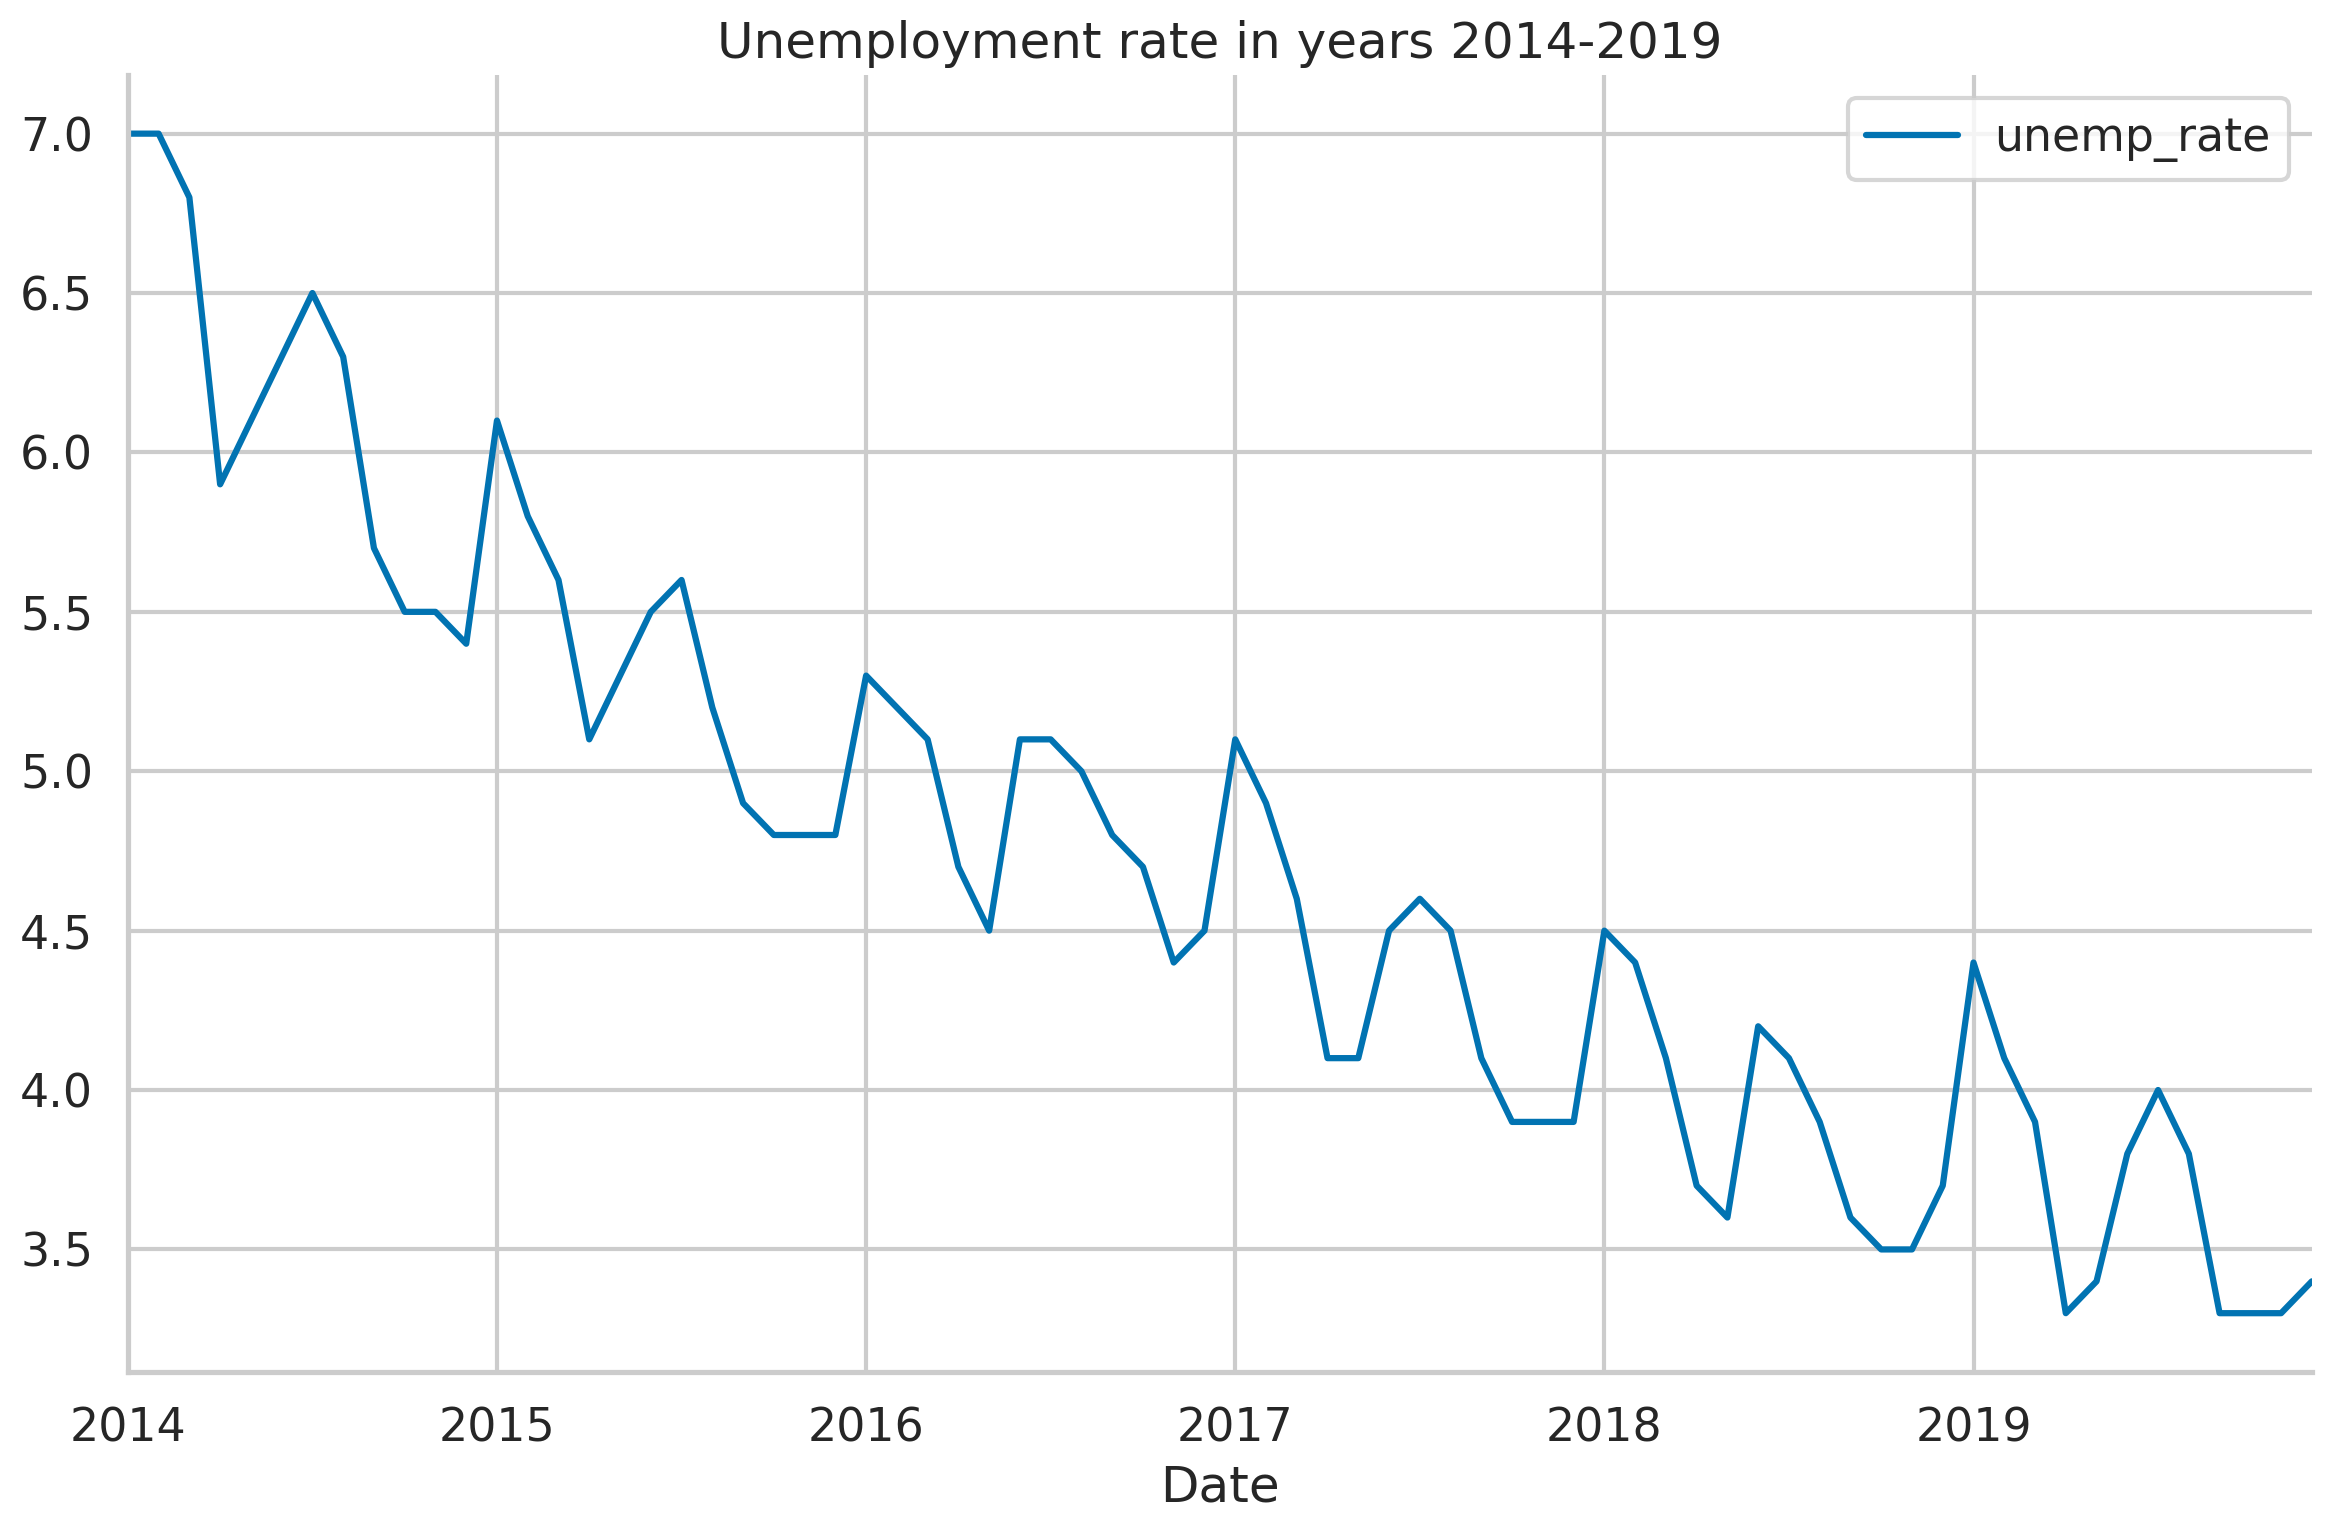

In [35]:
df.plot(title="Unemployment rate in years 2014-2019");
sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_6', dpi=200)

3. Create new columns with year and month:

- 세 번째 단계에서는 인덱스(데이터가 DatetimeIndex로 인코딩됨)에서 연도와 월 이름을 추출하여 두 개의 새로운 열을 생성했습니다. 

In [36]:
df["year"] = df.index.year
df["month"] = df.index.strftime("%b")

4. Create the seasonal plot:

- 마지막 단계에서는 sns.lineplot 함수를 사용하여 계절적 선 그래프를 만들었습니다. x축에 월을 사용하고, 각 연도를 별도의 선으로 그릴 것임을 hue 인수를 통해 지정했습니다.

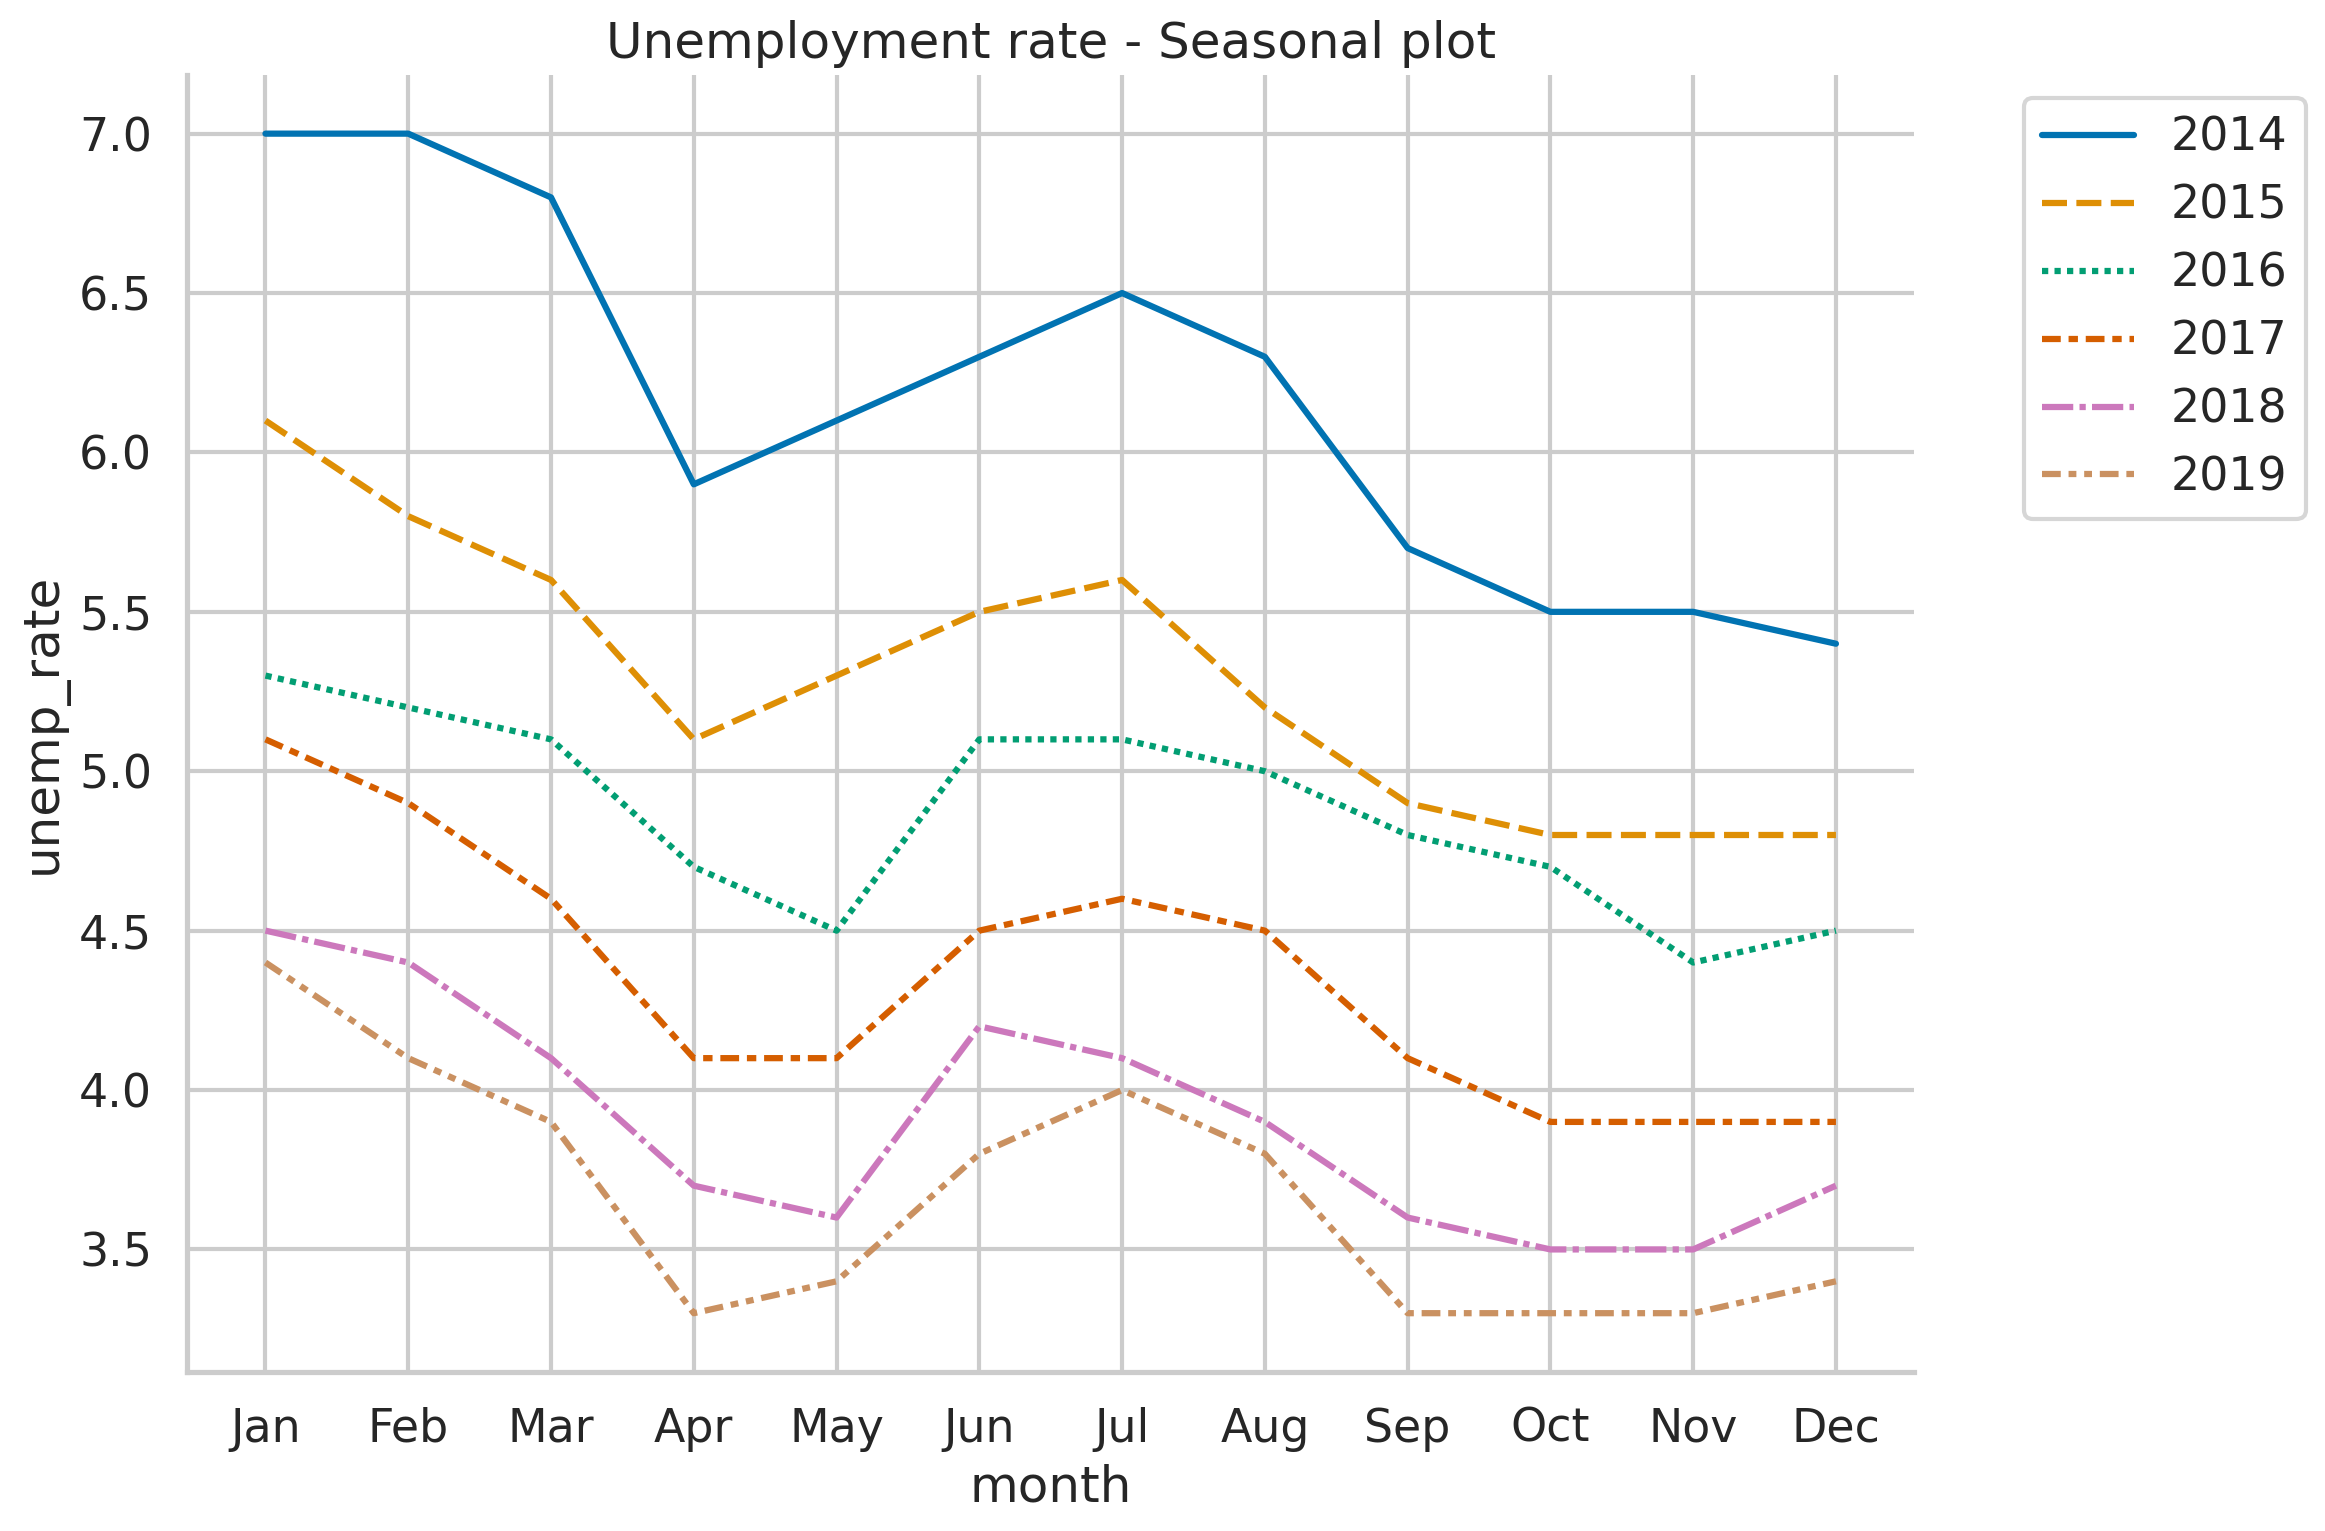

In [37]:
sns.lineplot(data=df, 
             x="month", 
             y="unemp_rate", 
             hue="year",
             style="year", 
             legend="full",
             palette="colorblind")

plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_7', dpi=200)

- 이러한 플롯은 다른 라이브러리를 사용해도 만들 수 있습니다. 우리는 seaborn을 사용하여 라이브러리를 소개했는데, seaborn은 matplotlib의 래퍼(wrapper)입니다. 일반적으로, 플롯에 통계 정보를 포함하고자 할 때는 seaborn을 사용하는 것이 권장됩니다. 예를 들어, 산점도에서 최적의 선(line of best fit)을 그릴 때 사용할 수 있습니다.

### There's more

- 우리는 이미 플롯에서 계절성을 조사하는 가장 간단한 방법을 살펴보았습니다. 이번 부분에서는 계절적 패턴에 대한 추가 정보를 드러낼 수 있는 몇 가지 대체 시각화 방법도 살펴보겠습니다.

1. Import the libraries:

In [38]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

2. Create a month plot:

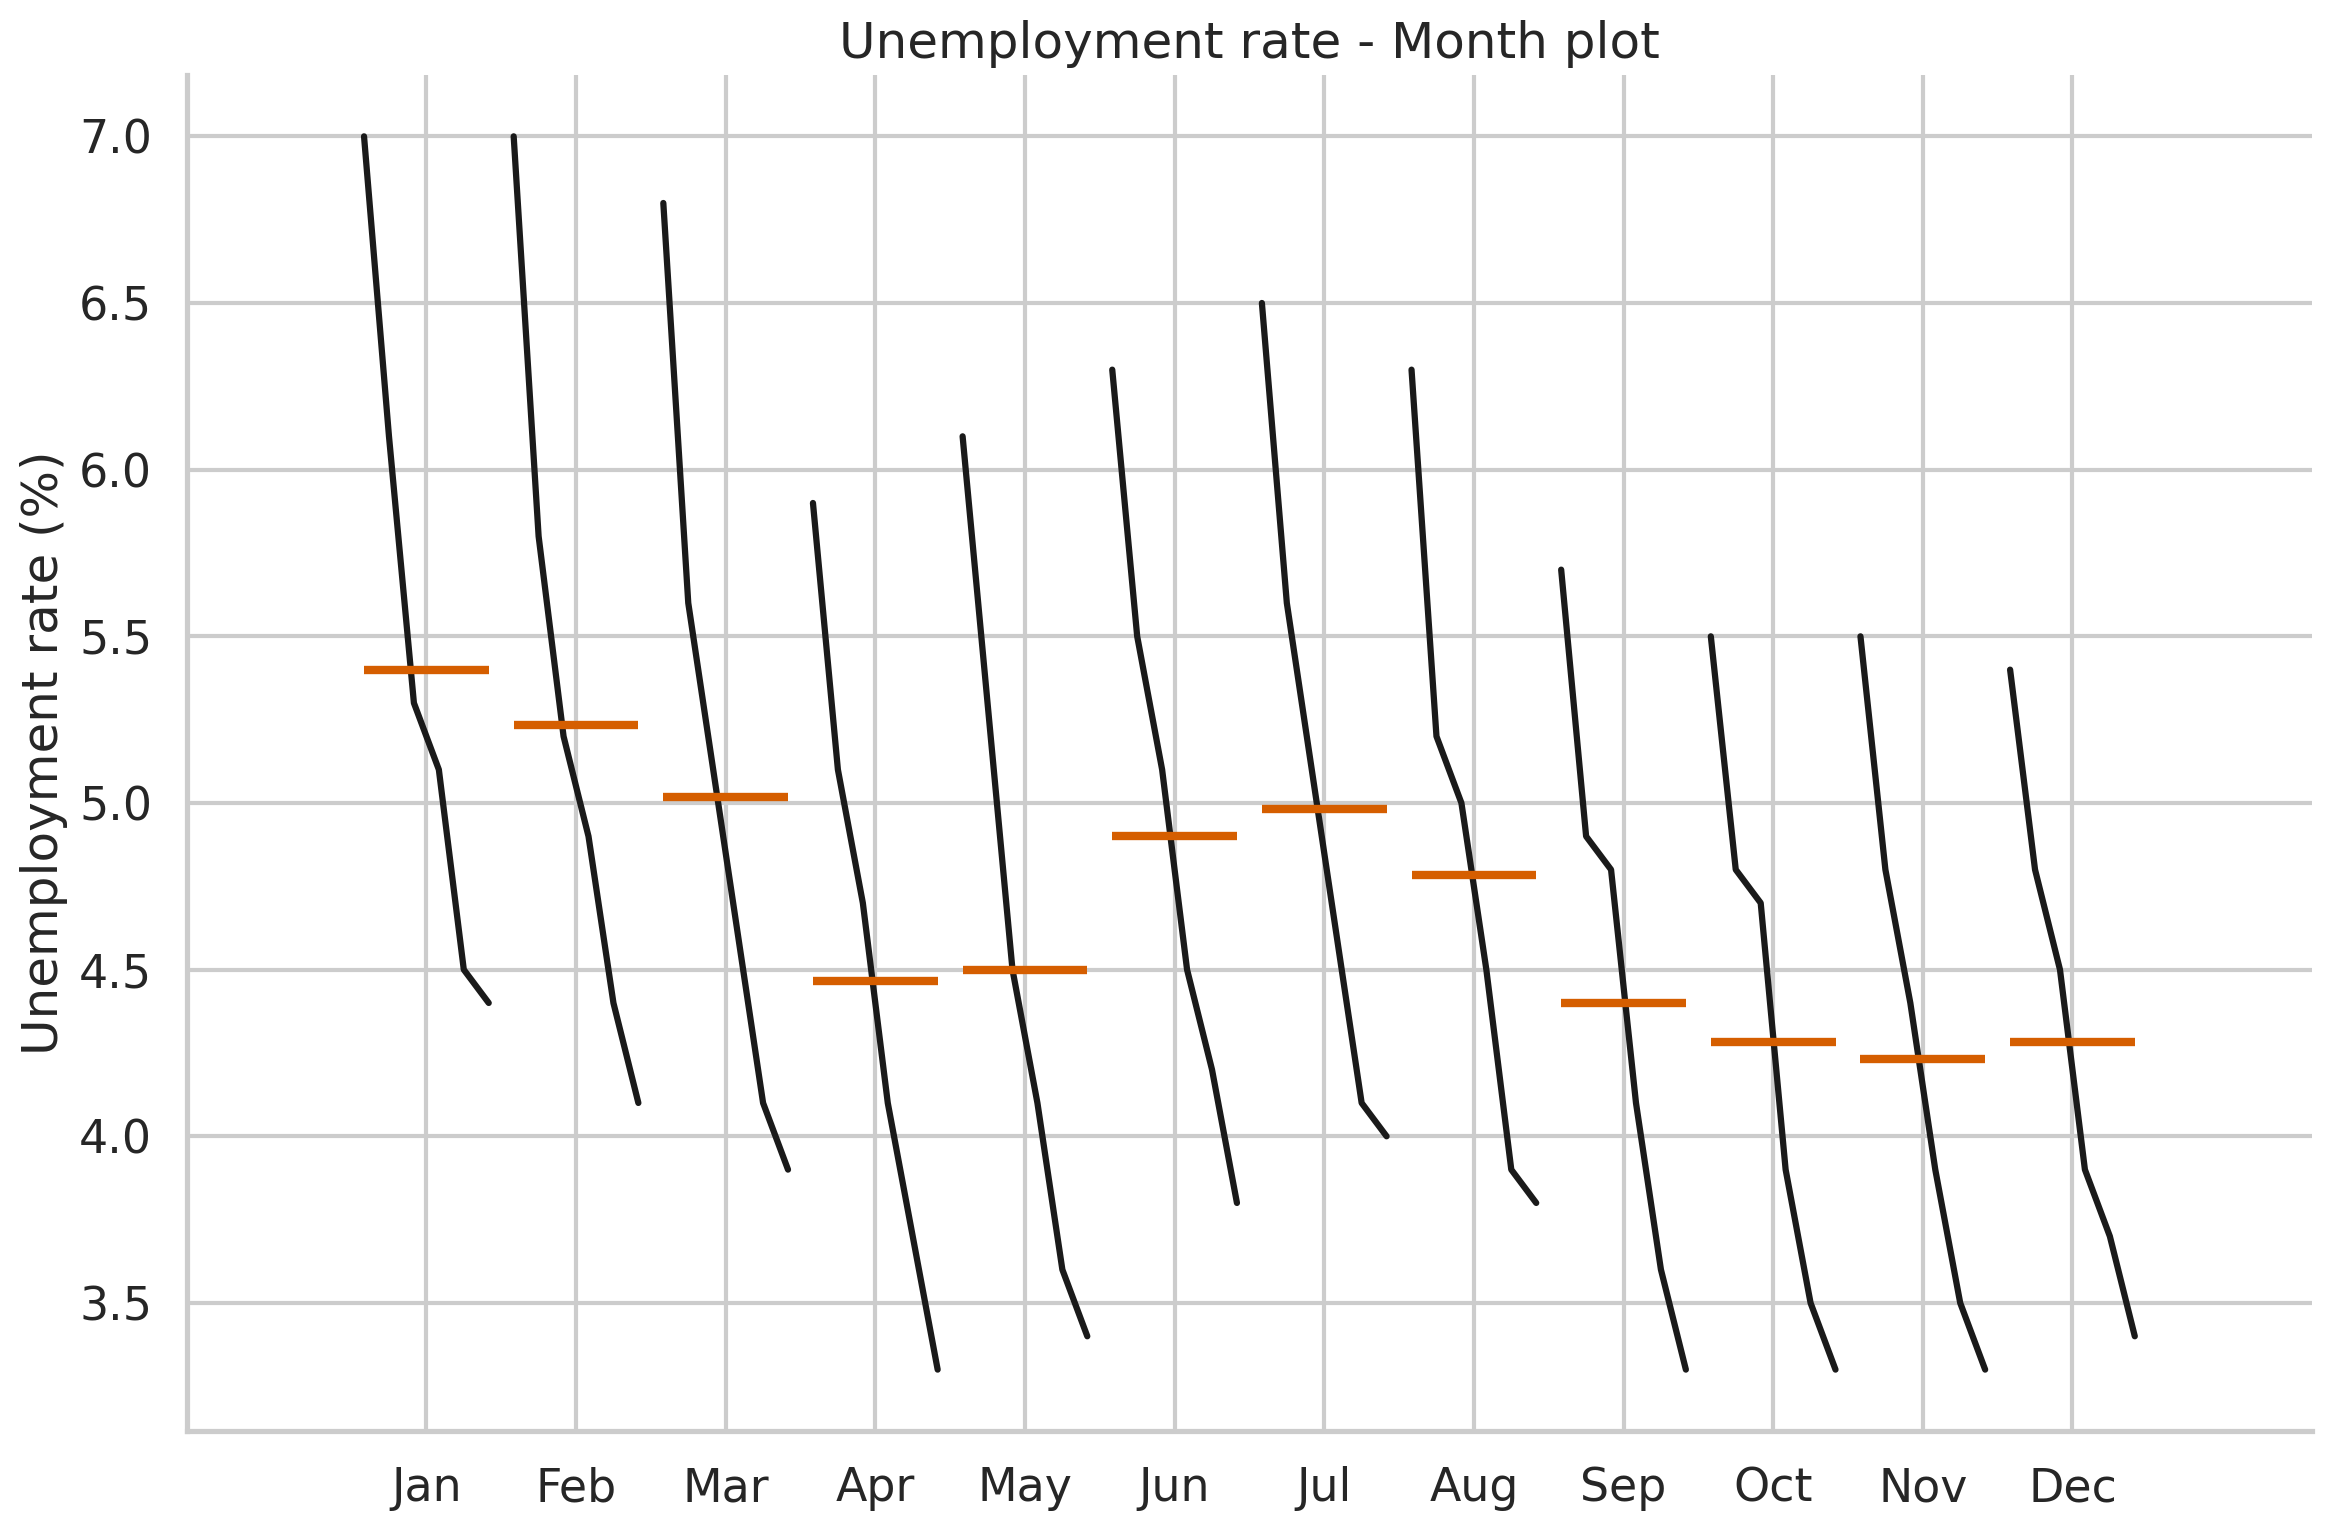

In [39]:
month_plot(df["unemp_rate"], ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Month plot");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_8', dpi=200)

- 월별 플롯(month plot)은 간단하면서도 유용한 시각화 방법입니다. 각 월마다 실업률이 시간에 따라 어떻게 변했는지를 별도의 선으로 나타내며, 시간 지점을 명시적으로 표시하지는 않습니다. 추가적으로, 빨간색 수평선은 해당 월의 평균값을 보여줍니다. 위 그림을 분석함으로써 몇 가지 결론을 도출할 수 있습니다:
    - 평균값을 살펴보면 앞서 설명한 패턴을 확인할 수 있습니다. 1월에 가장 높은 값을 보인 후 실업률이 감소하고, 여름철에는 다시 반등한 뒤 연말까지 계속해서 감소하는 패턴입니다.
    - 수년에 걸쳐 실업률이 감소했으나, 2019년에는 이전 해들에 비해 감소 폭이 작아진 것으로 보입니다. 이는 7월과 8월의 선들의 기울기를 비교함으로써 확인할 수 있습니다.

3. Create a quarter plot:

- 분기 플롯은 월 플롯과 매우 유사하지만 유일한 차이점은 x축에 월 대신 분기를 사용한다는 점입니다. 이 플롯을 얻으려면 각 분기의 평균값을 취하여 월별 실업률을 다시 샘플링해야 했습니다. 마지막 값도 사용할 수 있었습니다.

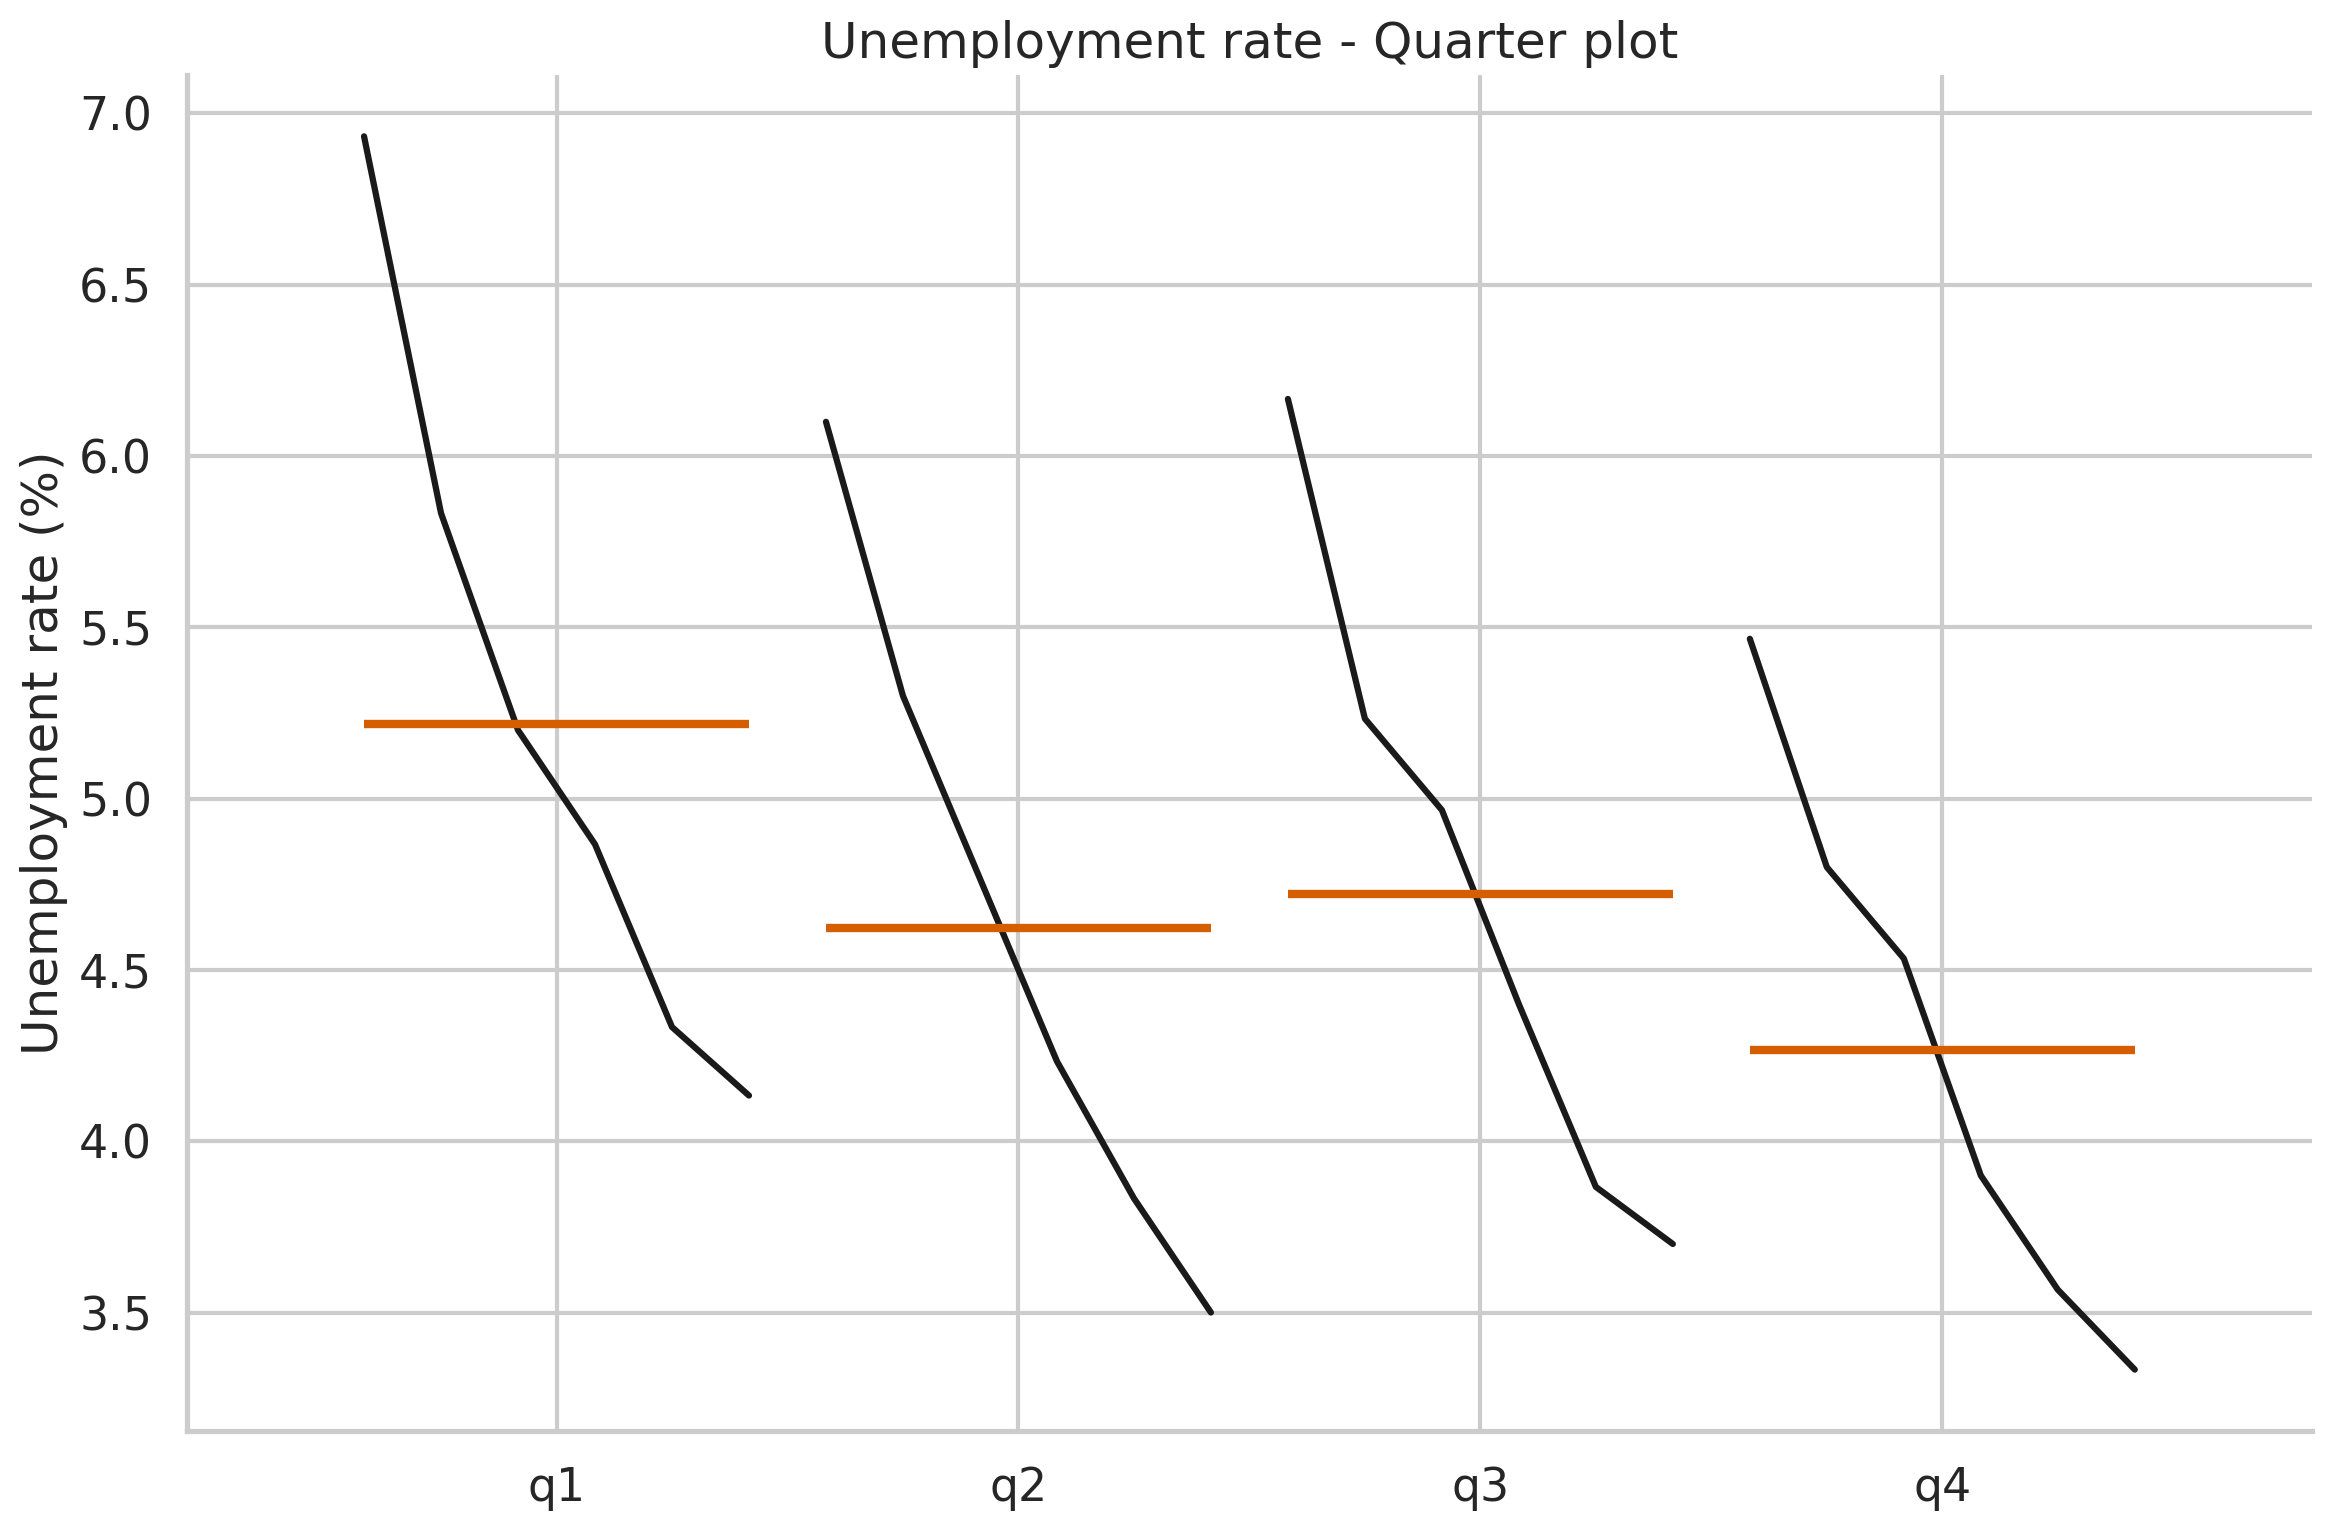

In [40]:
quarter_plot(df["unemp_rate"].resample("Q").mean(), 
             ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Quarter plot");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_9', dpi=200)

4. Create a polar seasonal plot using `plotly.express`:

- 마지막으로, 극좌표 평면에 선을 그리는 계절별 차트의 변형을 만들었습니다. 즉, 극좌표 차트는 방사형 및 각도 축을 따라 데이터를 시각화합니다. range_r=[3, 7]을 설정하여 방사형 범위의 상한을 수동으로 제한했습니다. 그렇지 않았다면 플롯이 0에서 시작하여 선 사이의 차이를 확인하기가 더 어려웠을 것입니다.
- 우리가 도출할 수 있는 결론은 일반적인 계절별 플롯의 결론과 유사하지만, 이 표현에 익숙해지는 데 시간이 걸릴 수 있습니다. 예를 들어, 2014년을 살펴보면 실업률이 그 해 1분기에 가장 높다는 것을 즉시 알 수 있습니다.

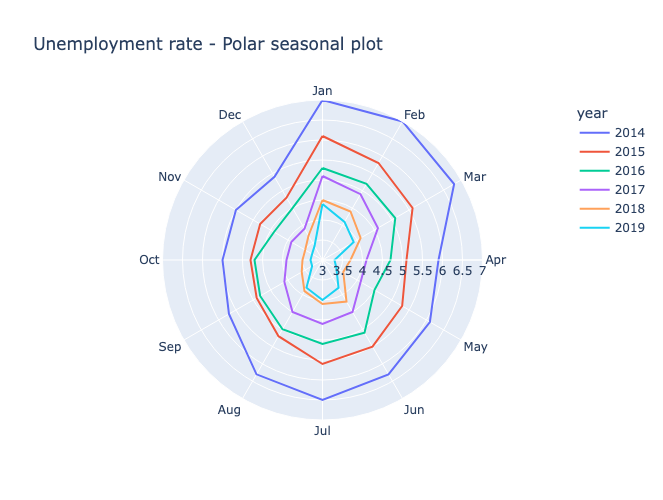

In [41]:
fig = px.line_polar(
    df, r="unemp_rate", theta="month", 
    color="year", line_close=True, 
    title="Unemployment rate - Polar seasonal plot",
    width=600, height=500,
    range_r=[3, 7]
)

fig.show()

## 3.3 Creating interactive visualizations 

첫 번째 레시피에서 우리는 파이썬에서 인터랙티브한 시각화를 만드는 것에 대한 간단한 미리보기를 제공했습니다. 이번 레시피에서는 세 가지 다른 라이브러리를 사용하여 인터랙티브 선 그래프를 만드는 방법을 보여드리겠습니다: **cufflinks**, **plotly**, 그리고 **bokeh**. 물론, 이들 외에도 인터랙티브 시각화를 위한 다른 라이브러리들이 존재합니다. 추가로 조사해볼 만한 또 다른 인기 있는 라이브러리로는 **altair**가 있습니다.

**plotly** 라이브러리는 d3.js(웹 브라우저에서 인터랙티브한 시각화를 생성하는 데 사용되는 JavaScript 라이브러리)를 기반으로 구축되었으며, 높은 수준의 상호작용 기능(관측값의 검사, 특정 지점의 툴팁 보기, 확대/축소 등)을 갖춘 고품질의 플롯을 생성하는 것으로 잘 알려져 있습니다. 또한, plotly는 이 라이브러리를 개발한 회사로, 시각화를 호스팅하는 서비스를 제공합니다. 우리는 오프라인에서 무제한으로 시각화를 생성할 수 있으며, 온라인에서 공유할 수 있는 무료 시각화도 몇 개 만들 수 있습니다(하루에 제한된 수의 조회만 가능).

**cufflinks**는 plotly를 기반으로 구축된 래퍼 라이브러리로, plotly 프레임워크의 일부로 **plotly.express**가 도입되기 전에 출시되었습니다. cufflinks의 주요 장점은 다음과 같습니다:
- 순수 plotly보다 플로팅이 훨씬 간편합니다.
- pandas DataFrame을 직접 사용하여 plotly 시각화를 생성할 수 있습니다.
- 금융 데이터 분석에 특화된 시각화 클래스(다음 레시피에서 다룰 예정)를 포함한 흥미로운 전문 시각화를 제공합니다.

마지막으로, **bokeh**는 주로 최신 웹 브라우저를 위한 인터랙티브 시각화를 만드는 또 다른 라이브러리입니다. bokeh를 사용하면 간단한 선 그래프에서부터 스트리밍 데이터셋을 포함한 복잡한 인터랙티브 대시보드에 이르기까지 아름다운 인터랙티브 그래픽을 만들 수 있습니다. bokeh 시각화는 JavaScript에 의해 구동되지만, 시각화를 만드는 데 JavaScript에 대한 실제 지식은 필요하지 않습니다.

이 레시피에서는 2020년의 마이크로소프트 주가를 사용하여 몇 가지 인터랙티브 선 그래프를 만들어 보겠습니다.

1. Import the libraries and initialize Notebook display:

In [5]:
# %pip install cufflinks
# %pip install pandas_bokeh
# %pip install --upgrade pandas-bokeh bokeh
# %pip install numpy==1.21.0 pandas==1.3.3

In [6]:
import pandas as pd 
import yfinance as yf

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh

cf.go_offline()
# initialize notebook display
pandas_bokeh.output_notebook()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

2. Download Microsoft's stock prices from 2020 and calculate simple returns:

In [72]:
df = yf.download("MSFT",
                 start="2020-01-01", 
                 end="2020-12-31",
                 auto_adjust = False, 
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.loc[:, ["Adj Close", "simple_rtn"]].dropna()
df = df.dropna()

3. Create the plot using `cufflinks`:

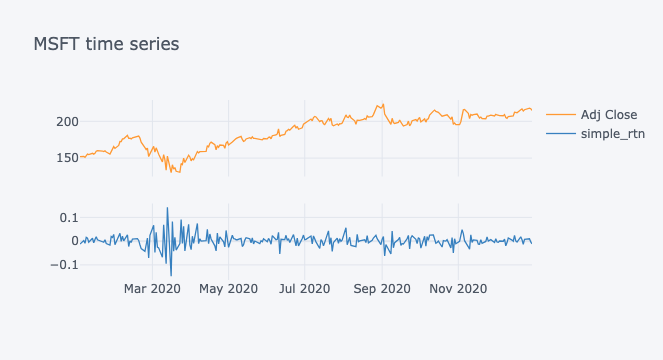

In [73]:
df.iplot(subplots=True, shape=(2,1), 
         shared_xaxes=True, 
         title="MSFT time series")

4. Create the plot using `bokeh`:

In [68]:
df["Adj Close"].plot_bokeh(kind="line", 
                           rangetool=True, 
                           title="MSFT time series");

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

5. Create the plot using `plotly.express`:

In [8]:
fig = px.line(data_frame=df, 
              y="Adj Close", 
              title="MSFT time series")
fig.show()

### There's more

1. Import the libraries:

In [5]:
from datetime import date

2. Define the annotations for the `plotly` plot:

In [6]:
selected_date_1 = date(2020, 2, 19)
selected_date_2 = date(2020, 3, 23)

selected_y_1 = (
    df
    .query(f"index == '{selected_date_1}'")
    .loc[:, "Adj Close"]
    .squeeze()
)
selected_y_2 = (
    df
    .query(f"index == '{selected_date_2}'")
    .loc[:, "Adj Close"]
    .squeeze()
)

first_annotation = {
    "x": selected_date_1,
    "y": selected_y_1,
    "arrowhead": 5,
    "text": "COVID decline starting",
    "font": {"size": 15, "color": "red"},
}

second_annotation = {
    "x": selected_date_2,
    "y": selected_y_2,
    "arrowhead": 5,
    "text": "COVID recovery starting",
    "font": {"size": 15, "color": "green"},
    "ax": 150,
    "ay": 10
}

3. Update the layout of the plot and show it:

In [9]:
fig.update_layout(
    {"annotations": [first_annotation, second_annotation]}
)
fig.show()

## 3.4 Creating a candlestick chart

### Getting ready

1. Import the libraries:

In [28]:
import pandas as pd 
import yfinance as yf

2. Download the adjusted prices from Yahoo Finance:

In [29]:
df = yf.download("TWTR", 
                 start="2018-01-01", 
                 end="2018-12-31",
                 progress=False,
                 auto_adjust=True)

### How to do it...

1. Import the libraries:

In [30]:
import cufflinks as cf
from plotly.offline import iplot

cf.go_offline()

As an alternative to running `cf.go_offline()` every time, we can also modify the settings to always use the offline mode by running: `cf.set_config_file(offline=True)`. We can then view the settings using `cf.get_config_file()`.

In [31]:
cf.set_config_file(offline=False)

In [32]:
cf.get_config_file()

{'sharing': 'public',
 'theme': 'pearl',
 'colorscale': 'dflt',
 'offline': False,
 'offline_connected': True,
 'offline_url': '',
 'offline_show_link': True,
 'offline_link_text': 'Export to plot.ly',
 'datagen_mode': 'stocks',
 'dimensions': None,
 'margin': None,
 'offline_config': None}

2. Create the candlestick chart using Twitter's stock prices:

In [33]:
qf = cf.QuantFig(
    df, title="Twitter's Stock Price", 
    legend="top", name="Twitter's stock prices in 2018"
)

3. Add volume and moving averages to the figure:

In [34]:
qf.add_volume()
qf.add_sma(periods=20, column="Close", color="red")
qf.add_ema(periods=20, color="green") 

4. Display the plot:

In [35]:
qf.iplot()

### There's more

1. Import the libraries:

In [36]:
import plotly.graph_objects as go
import mplfinance as mpf

2. Create a candlestick chart using `plotly`:

In [37]:
fig = go.Figure(data=
    go.Candlestick(x=df.index,
                   open=df["Open"],
                   high=df["High"],
                   low=df["Low"],
                   close=df["Close"])
)

fig.update_layout(
    title="Twitter's stock prices in 2018",
    yaxis_title="Price ($)"
)

fig.show()

3. Create a candlestick chart using `mplfinance`:

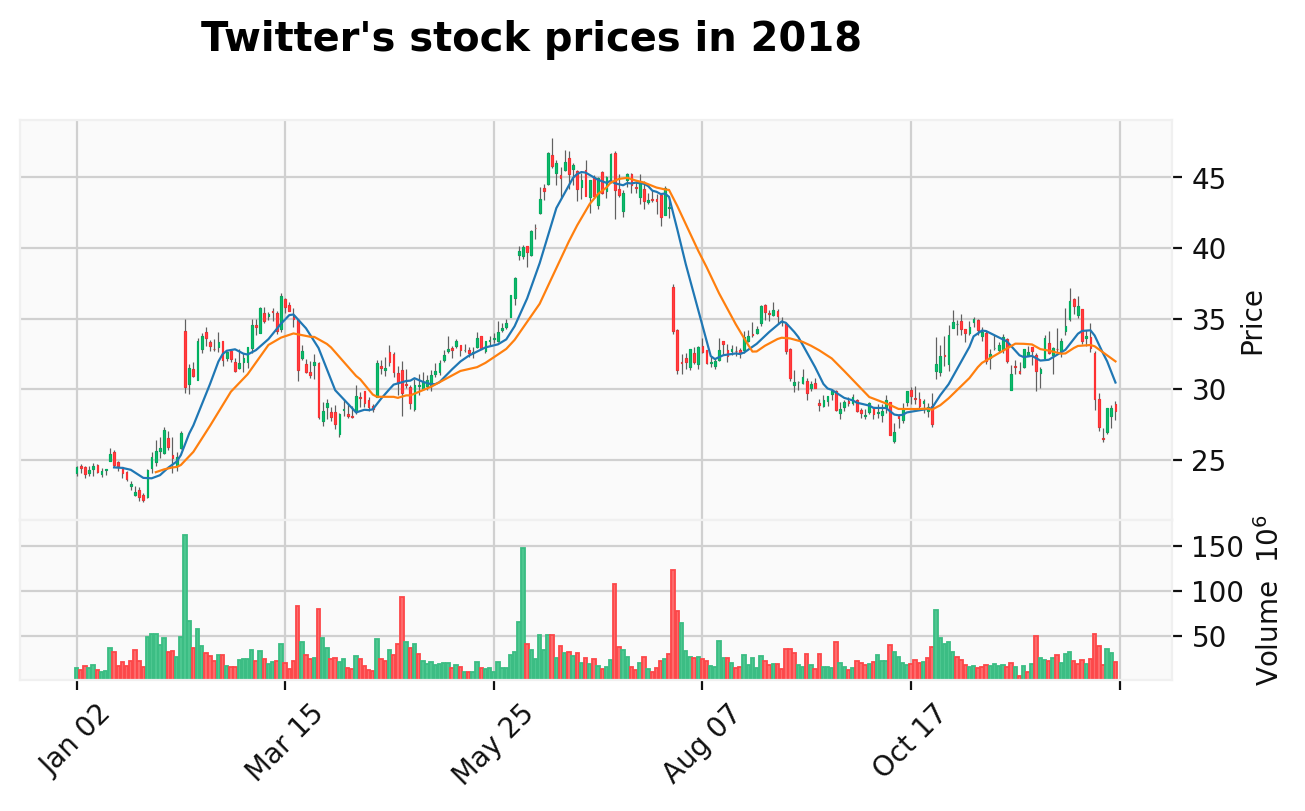

<Figure size 640x480 with 0 Axes>

In [38]:
mpf.plot(df, type="candle", 
         mav=(10, 20), 
         volume=True, 
         style="yahoo", 
         title="Twitter's stock prices in 2018", 
         figsize=(8, 4));

sns.despine()
plt.tight_layout()